# heart attack analysis
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


* https://www.kaggle.com/houssemayed/heart-disease-prediction-feature-engineering

In [1]:
ls

0414.ipynb                 reddit_vm.csv
ROC.png                    tree acc norm.png
ROC_pca.png                tree acc.png
confusion_matrix.png       tree-report.pdf
confusion_matrix_norm.png  tree_cm.xlsx
confusion_matrix_pca.png   tree_viz.png
corr.png                   y.png
heart.csv                  y_test.png
img/                       y_test_smote.png
pairplot.png               y_train_old.png
pca.png                    y_train_smote.png


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv("heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
#檢查是否有空值
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

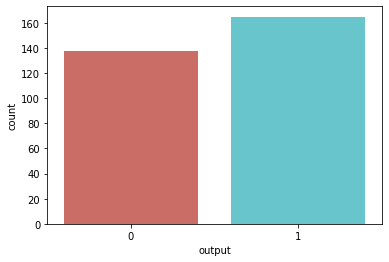

In [4]:
sns.countplot(x='output',data=df,palette='hls')
plt.savefig('y.png')

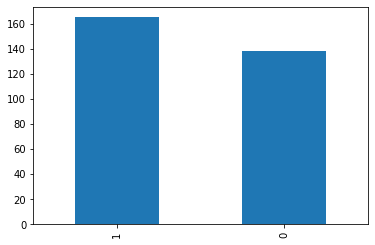

In [5]:
df['output'].value_counts().plot(kind='bar')

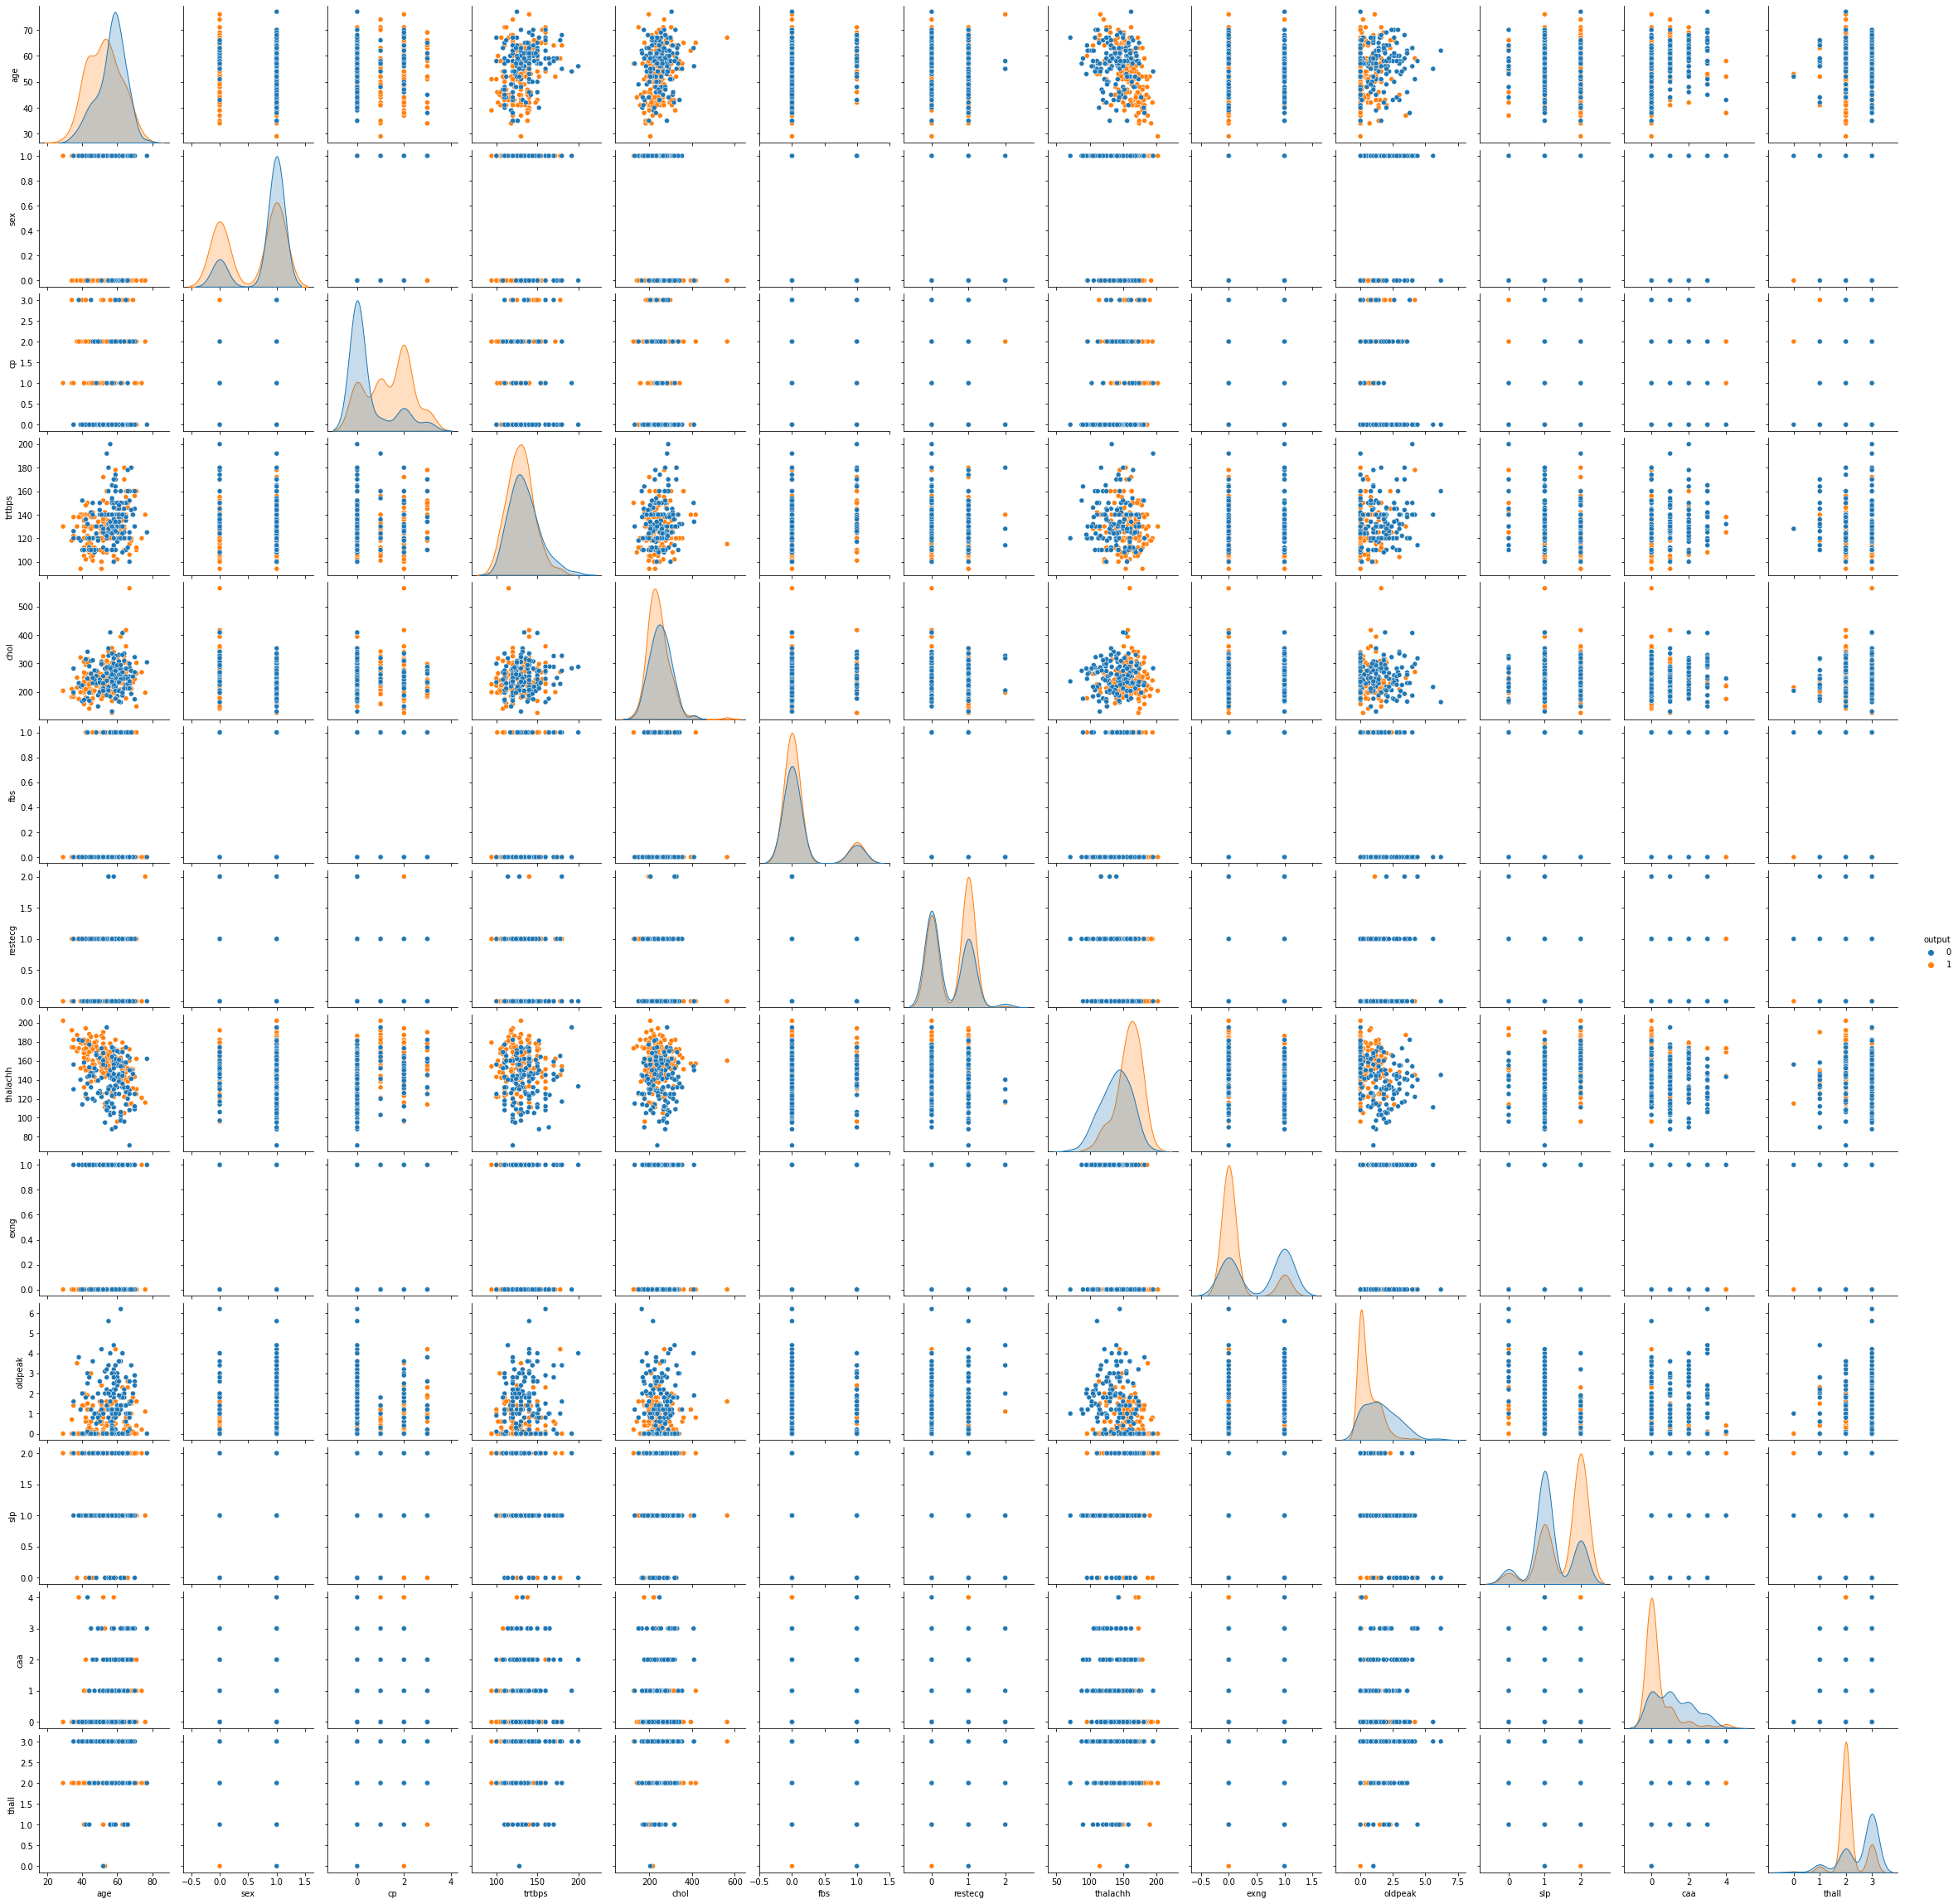

In [6]:
sns.pairplot(df,hue='output')
plt.savefig('pairplot.png')

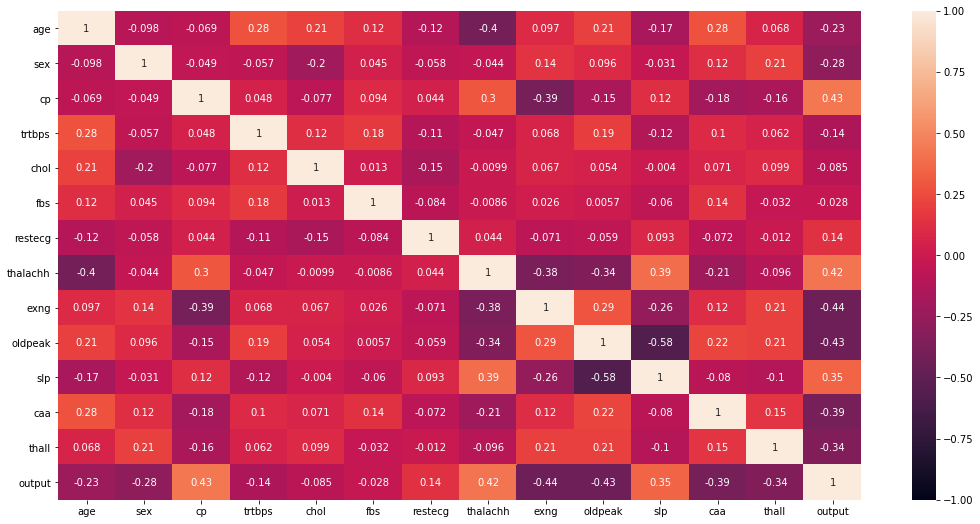

In [7]:
plt.figure(figsize=(18, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig('corr.png')

In [3]:
X = df.drop(['output'],axis=1)
y = df[['output']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227, 13) (227, 1)
(76, 13) (76, 1)


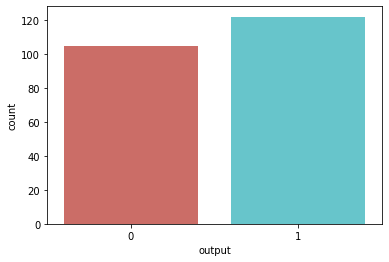

In [9]:
sns.countplot(x='output',data=y_train,palette='hls')
plt.savefig('y_train_old.png')

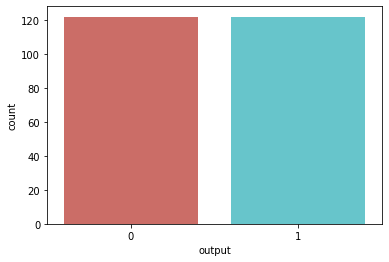

In [4]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

sns.countplot(x='output',data=y_train_sm,palette='hls')
plt.savefig('y_train_smote.png')

best: 0.8157894736842105 depth: 7


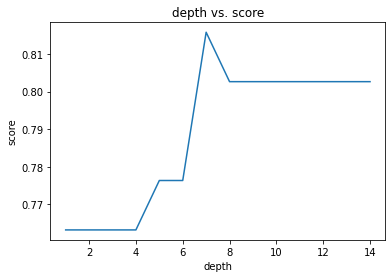

In [5]:
from sklearn.tree import DecisionTreeClassifier
max_depth_range = list(range(1, 15))

# List to store the accuracy for each value of max_depth:
accuracy = []
models = []
for depth in max_depth_range:
 
    clf = DecisionTreeClassifier(max_depth = depth,random_state = 0)
    clf.fit(X_train_sm, y_train_sm)
    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    models.append(clf)
    
best_score = max(accuracy)
best_depth = max_depth_range[accuracy.index(best_score)]
print("best:",best_score, "depth:",best_depth)
plt.plot(max_depth_range,accuracy)
plt.xlabel("depth")
plt.ylabel("score")
plt.title("depth vs. score")
plt.savefig('tree acc.png')

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.84      0.84      0.84        43

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



0.8125440451021847

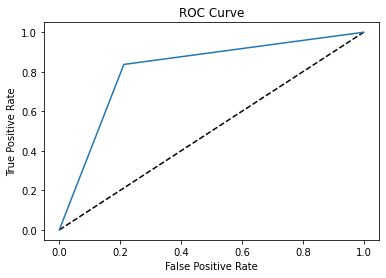

In [12]:
best_clf = DecisionTreeClassifier(max_depth = best_depth,random_state = 0)
best_clf.fit(X_train_sm, y_train_sm)
y_pred = best_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, roc_curve
print(classification_report(y_test, y_pred))
fpr,tpr,threshols=roc_curve(y_test,y_pred)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='tree classifier ')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.savefig('ROC.png')
from sklearn import metrics
metrics.auc(fpr, tpr)

In [13]:
models

[DecisionTreeClassifier(max_depth=1, random_state=0),
 DecisionTreeClassifier(max_depth=2, random_state=0),
 DecisionTreeClassifier(max_depth=3, random_state=0),
 DecisionTreeClassifier(max_depth=4, random_state=0),
 DecisionTreeClassifier(max_depth=5, random_state=0),
 DecisionTreeClassifier(max_depth=6, random_state=0),
 DecisionTreeClassifier(max_depth=7, random_state=0),
 DecisionTreeClassifier(max_depth=8, random_state=0),
 DecisionTreeClassifier(max_depth=9, random_state=0),
 DecisionTreeClassifier(max_depth=10, random_state=0),
 DecisionTreeClassifier(max_depth=11, random_state=0),
 DecisionTreeClassifier(max_depth=12, random_state=0),
 DecisionTreeClassifier(max_depth=13, random_state=0),
 DecisionTreeClassifier(max_depth=14, random_state=0)]

mkdir: img: File exists
zsh:1: no matches found: img/*tree_viz.png


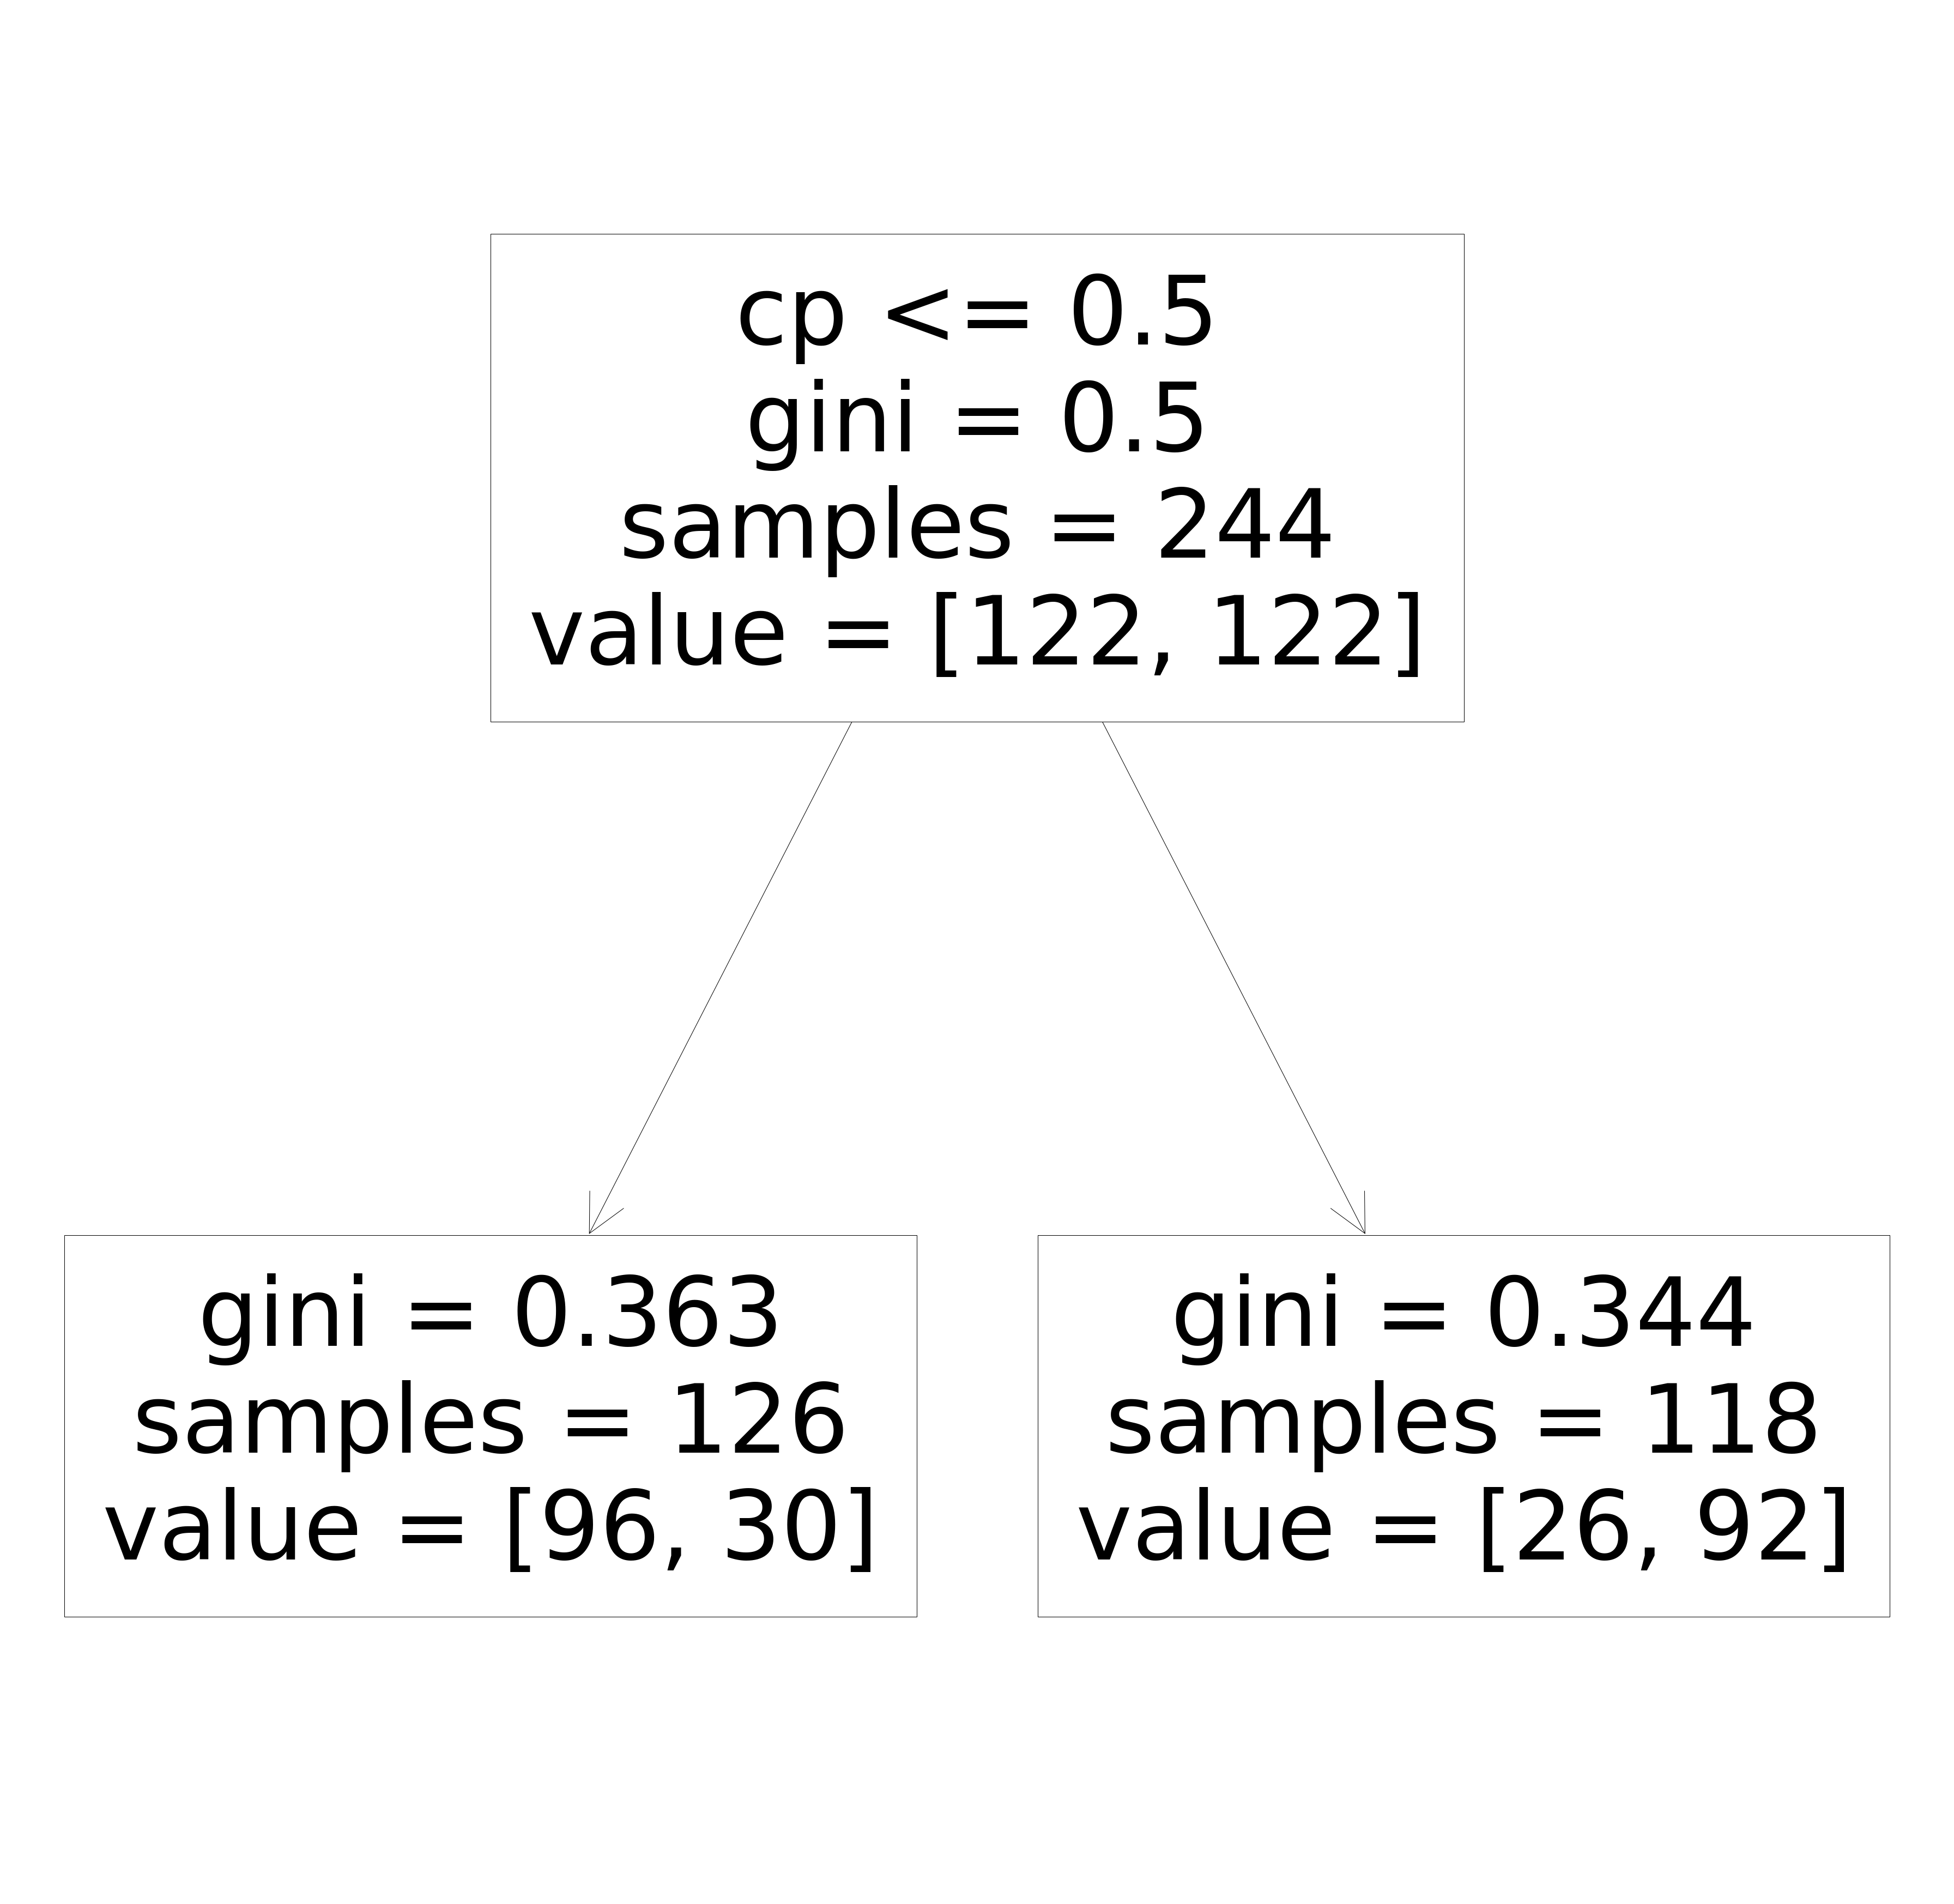

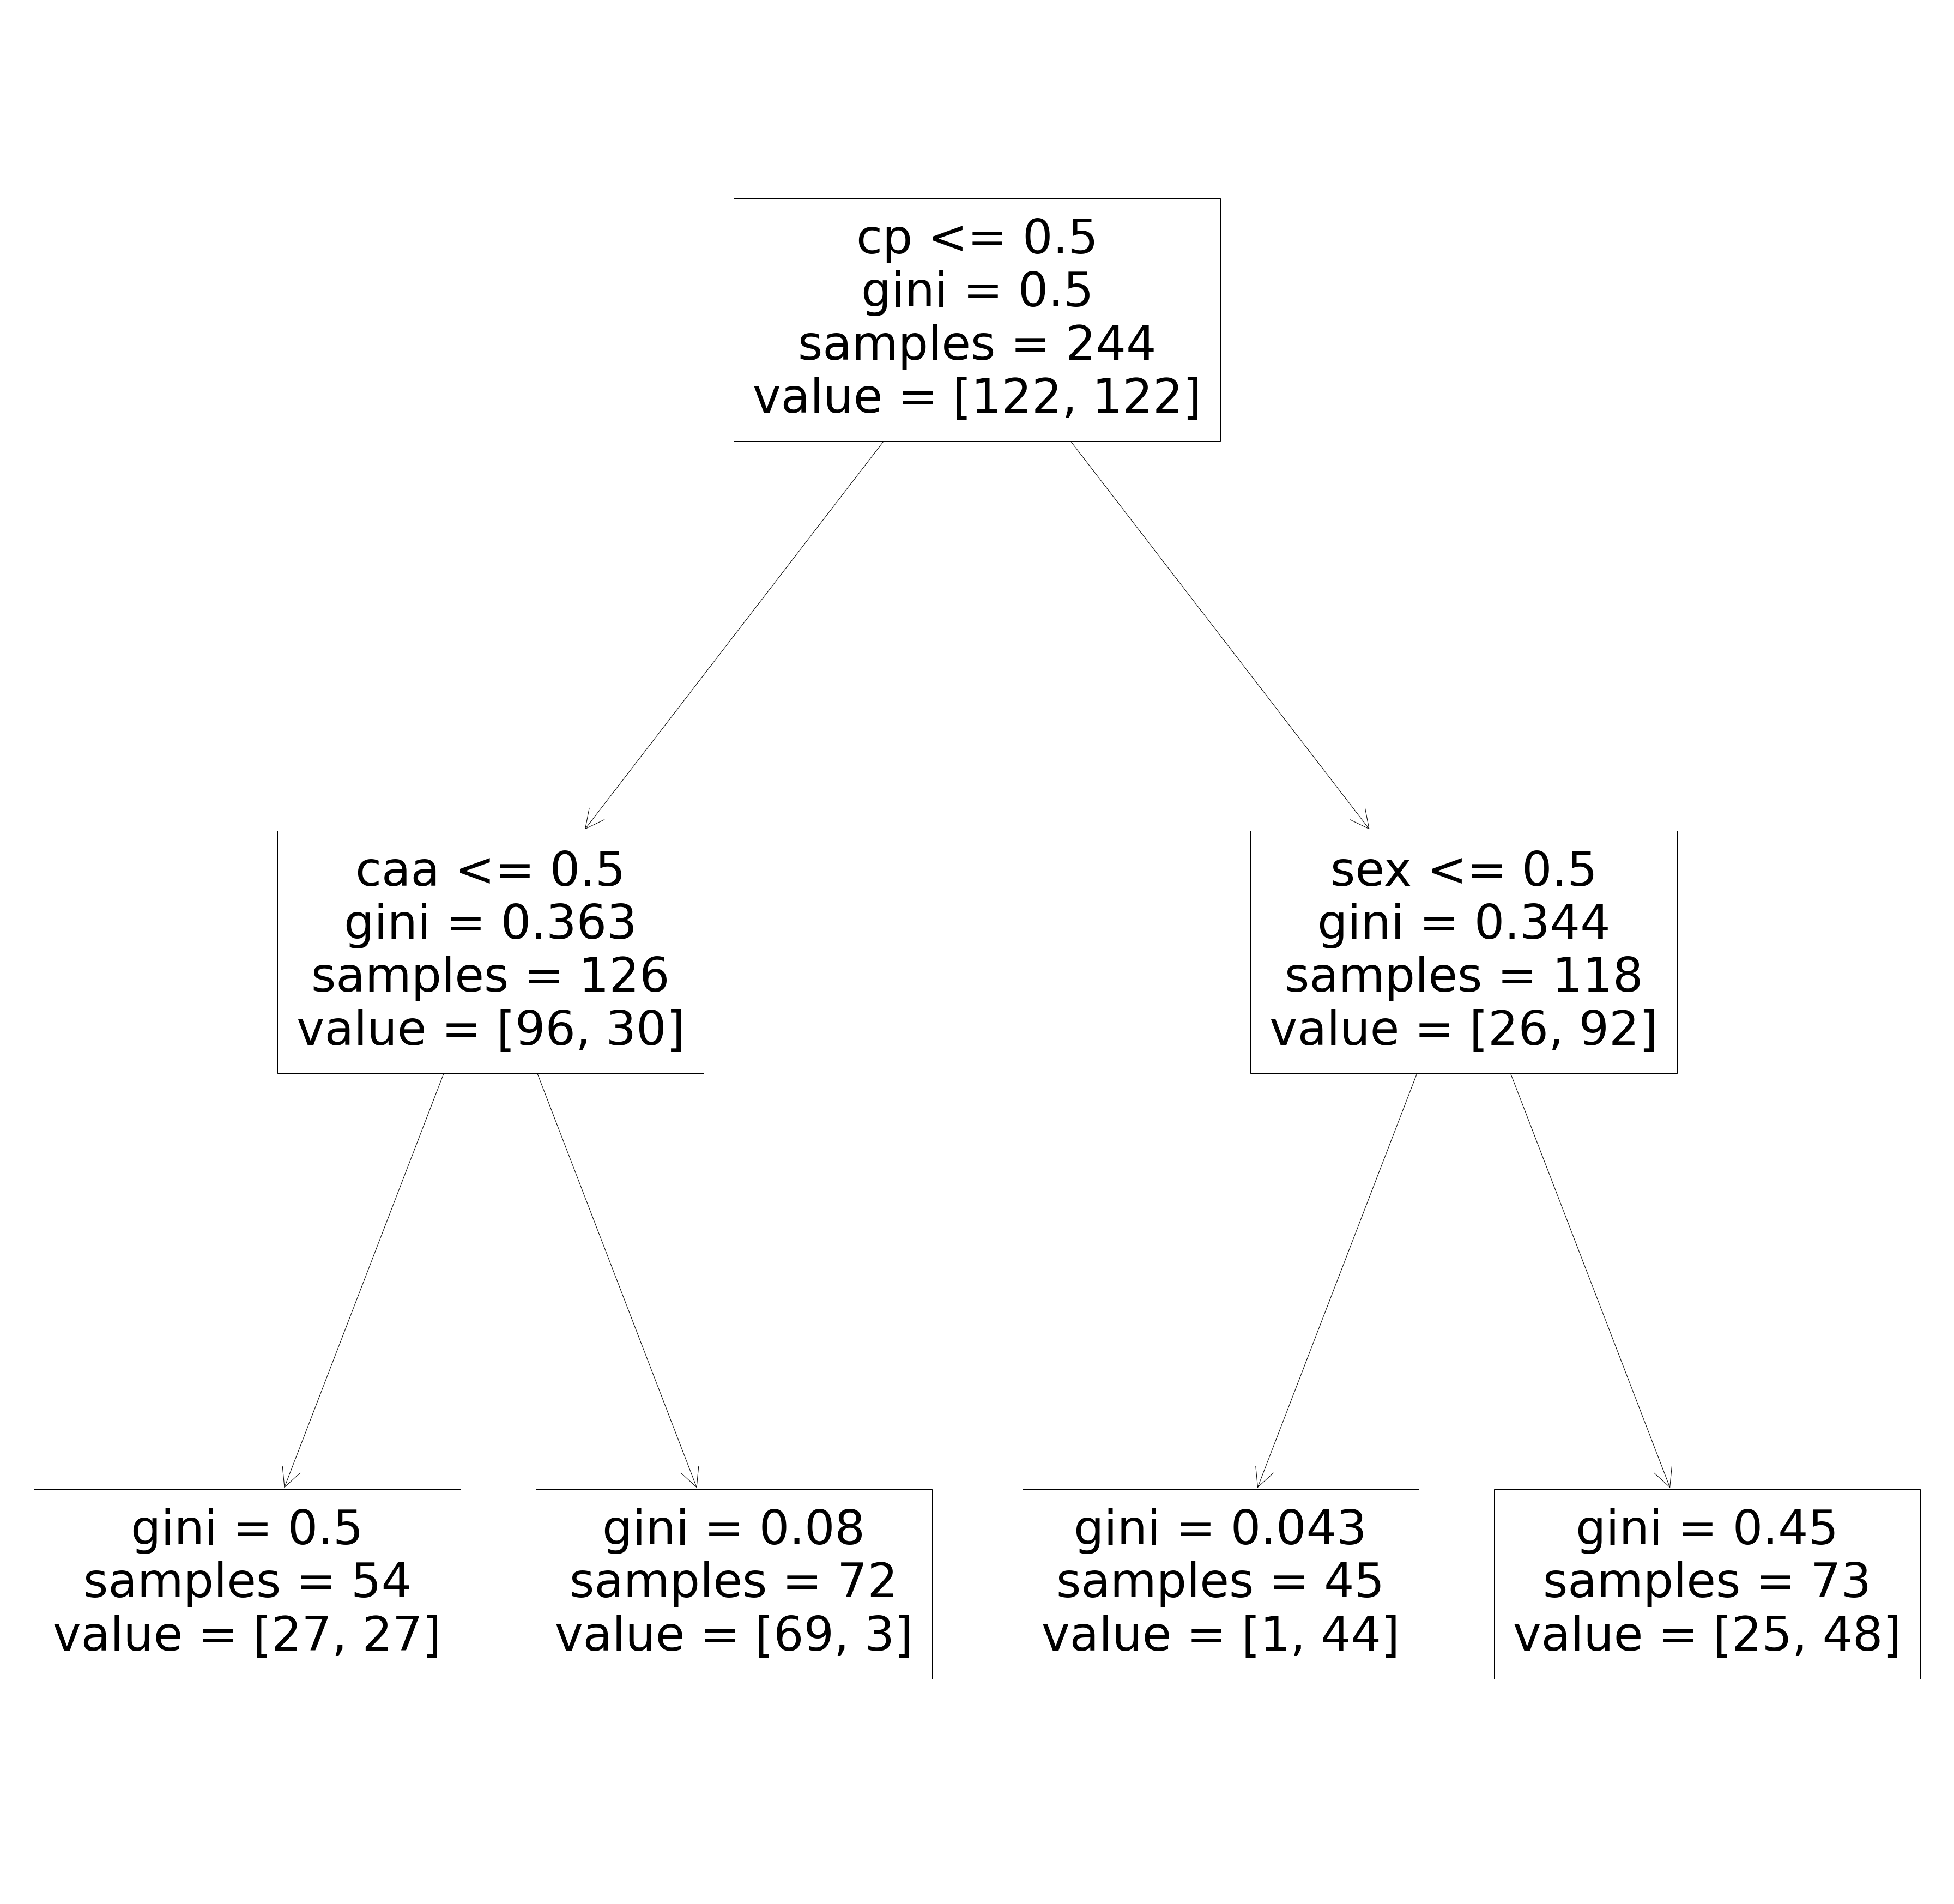

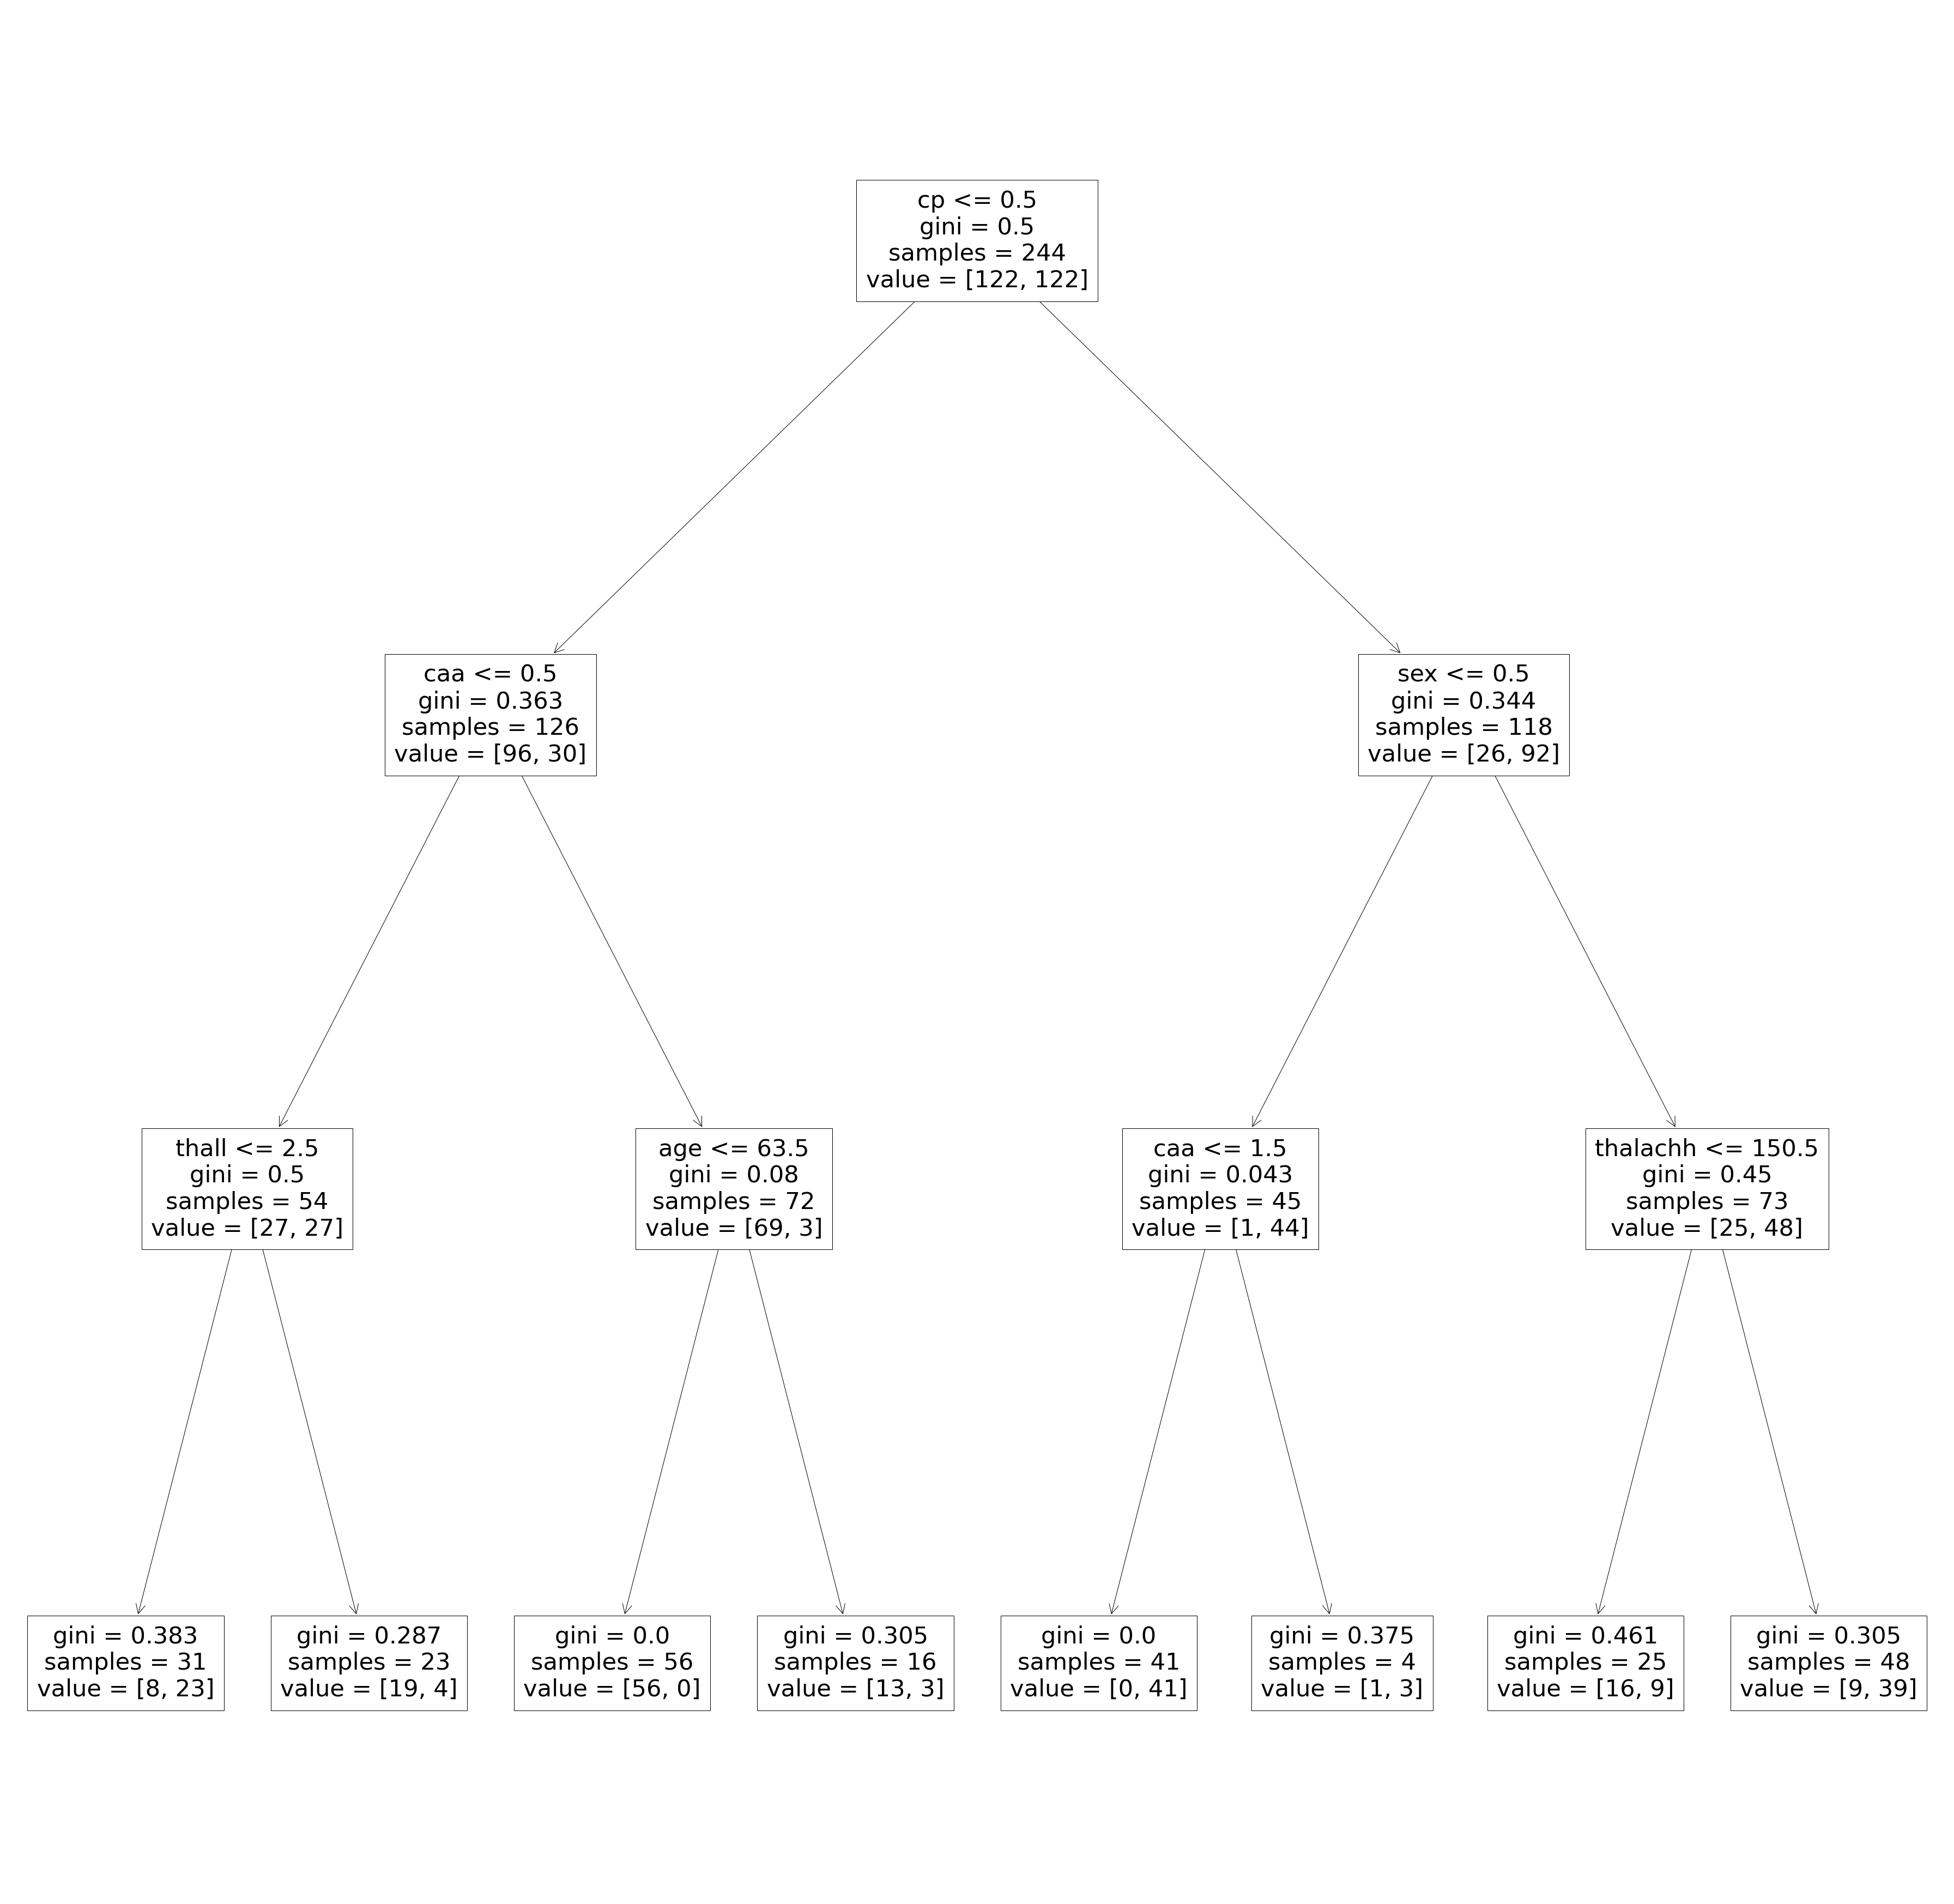

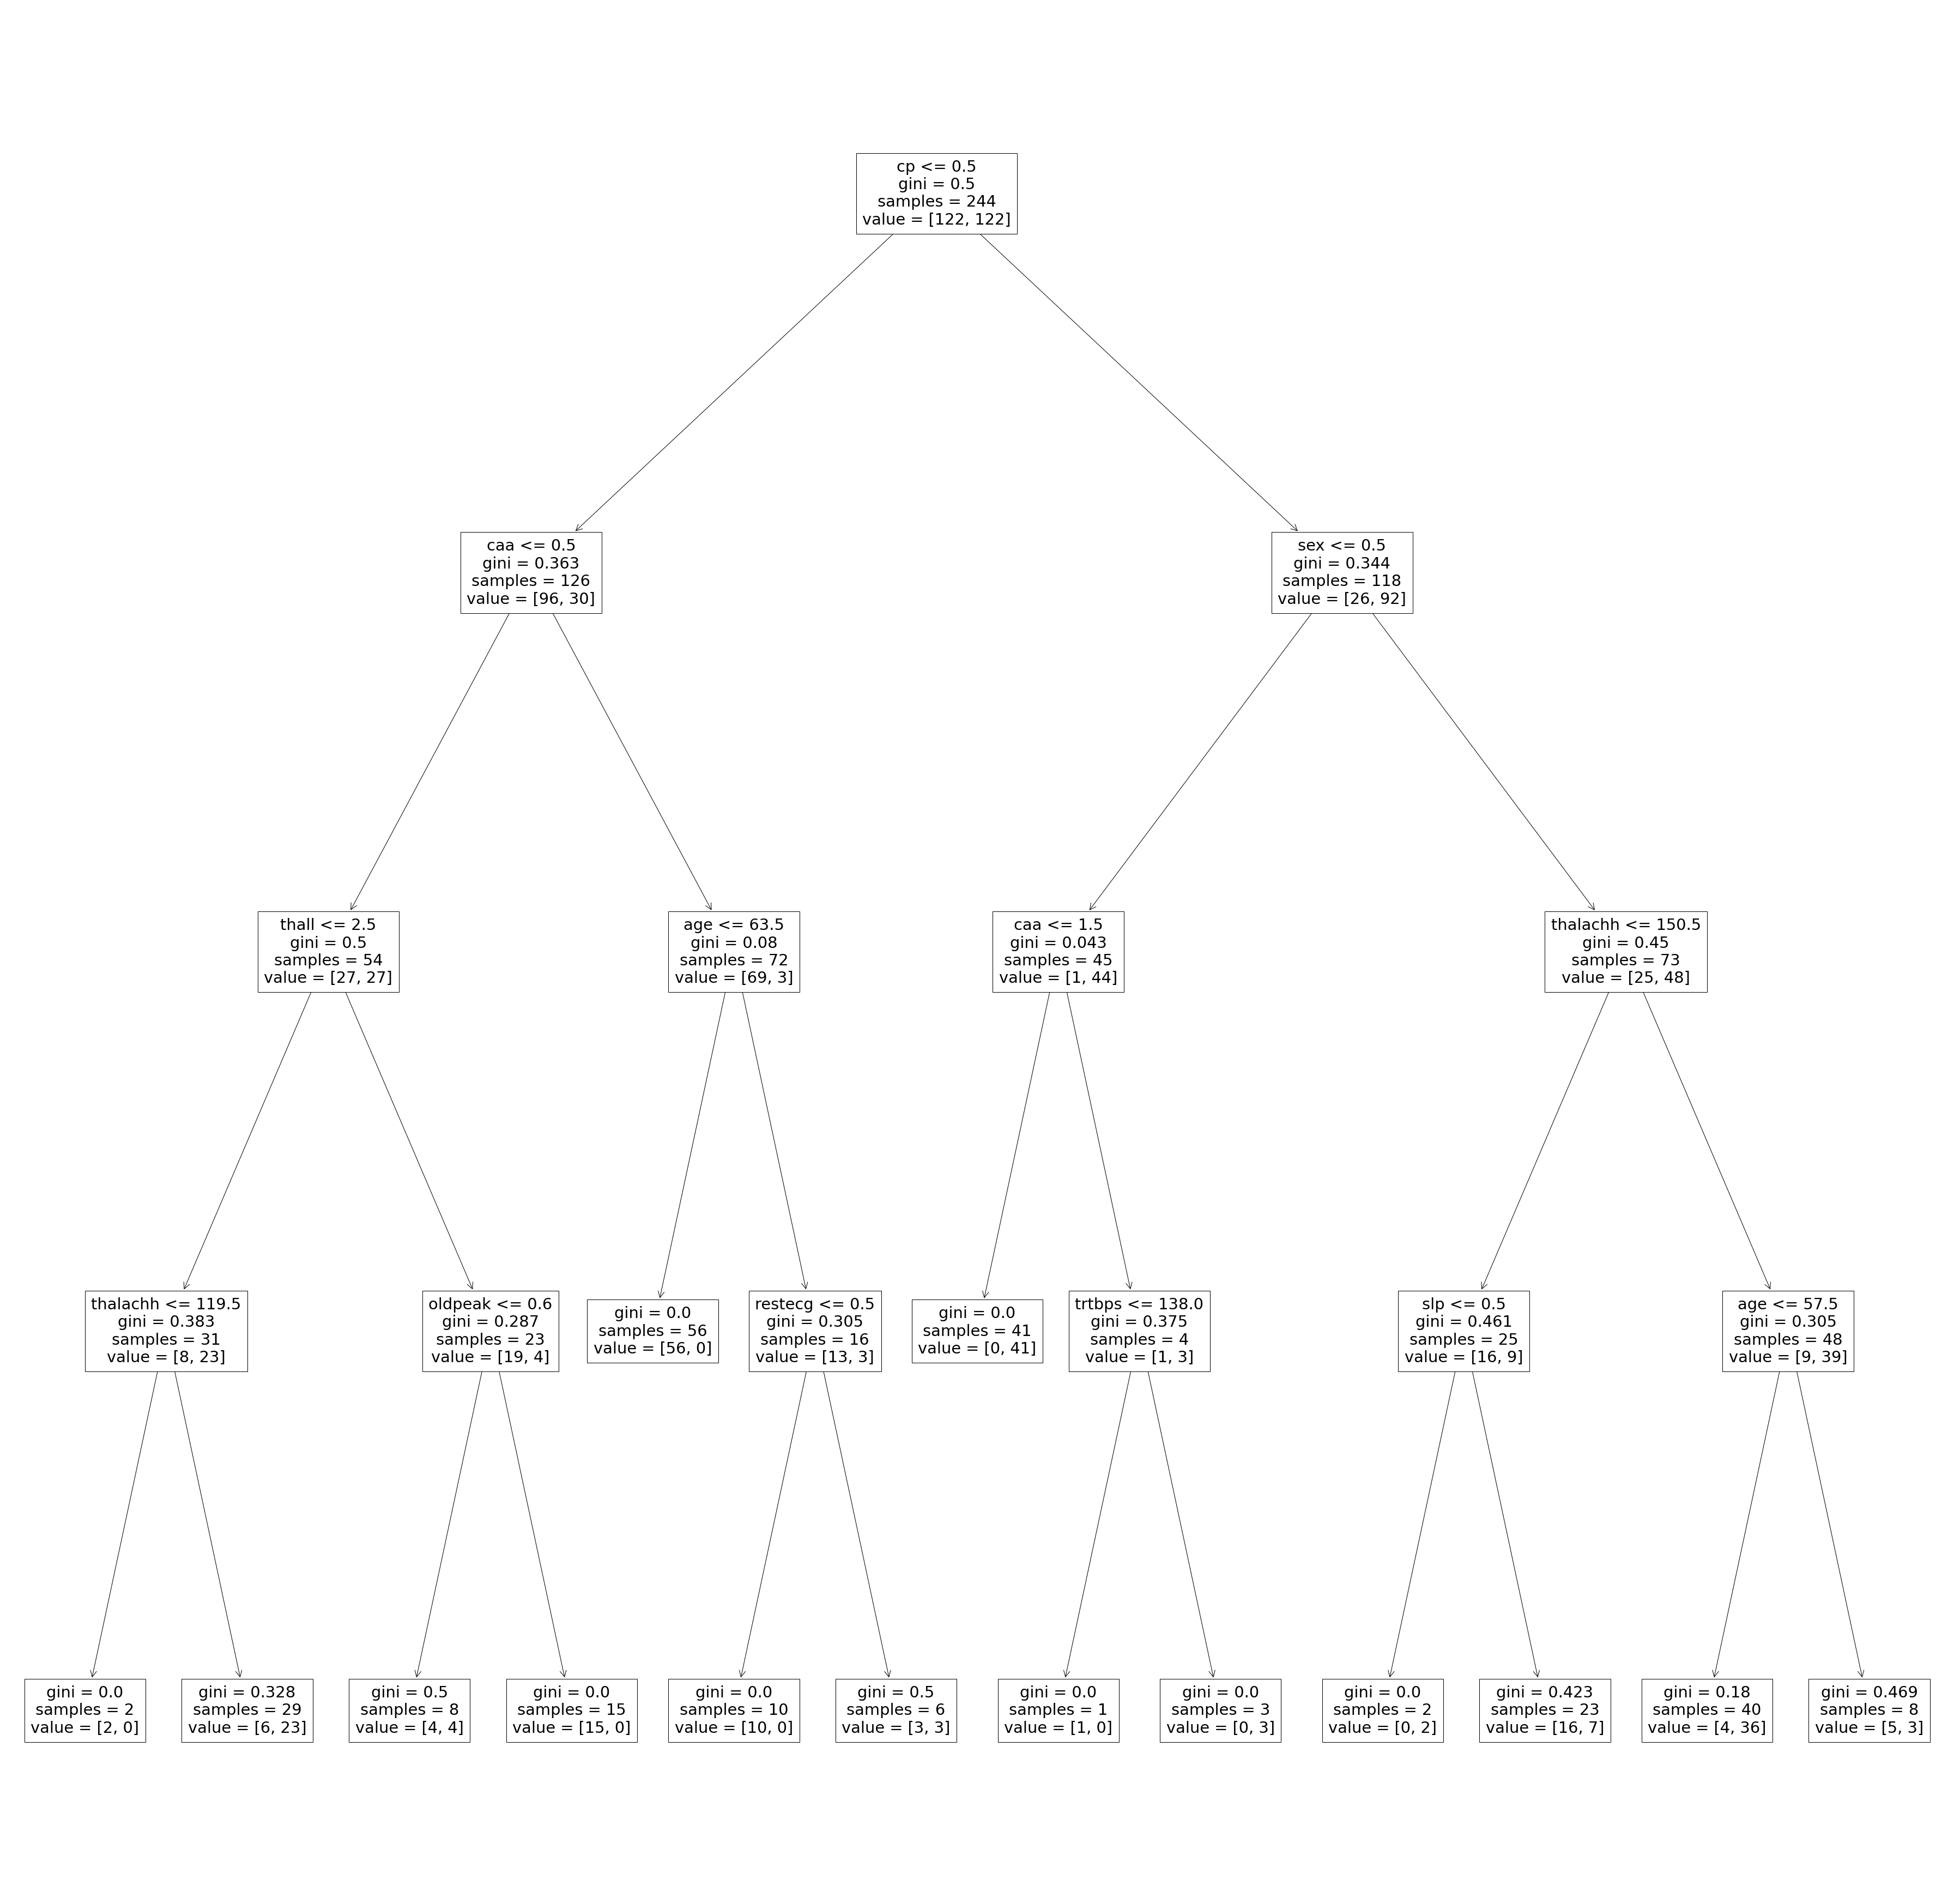

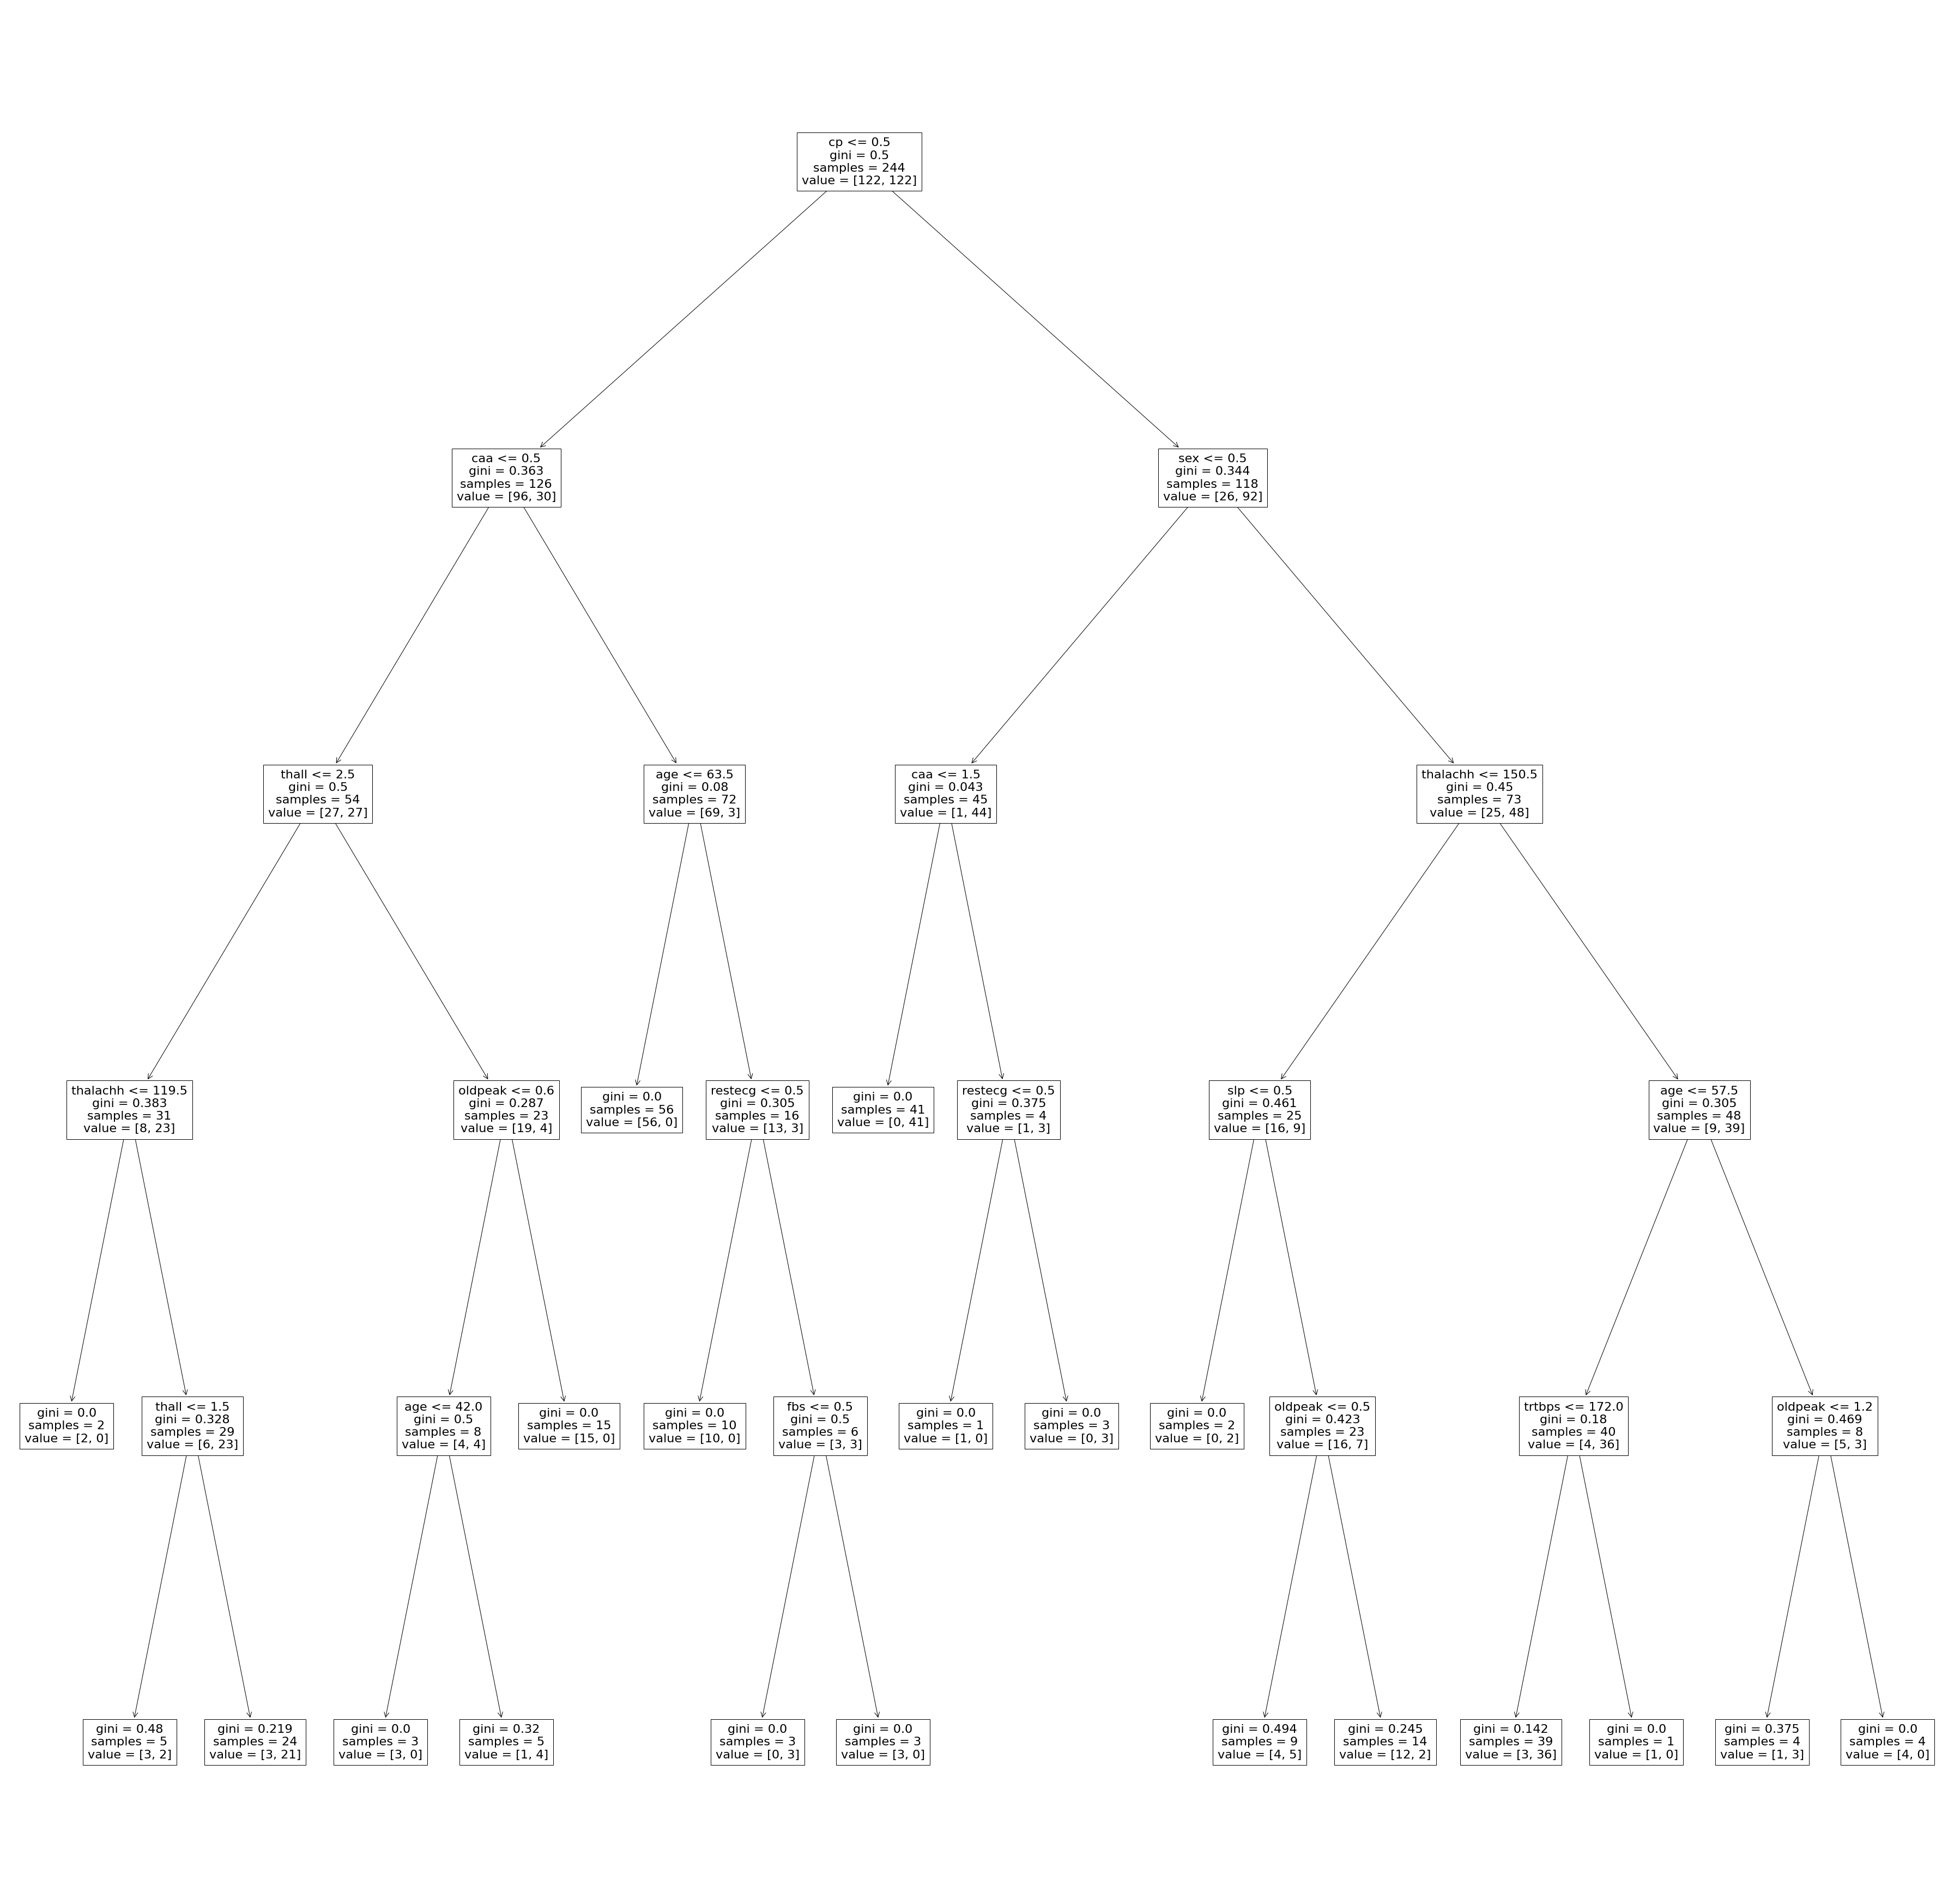

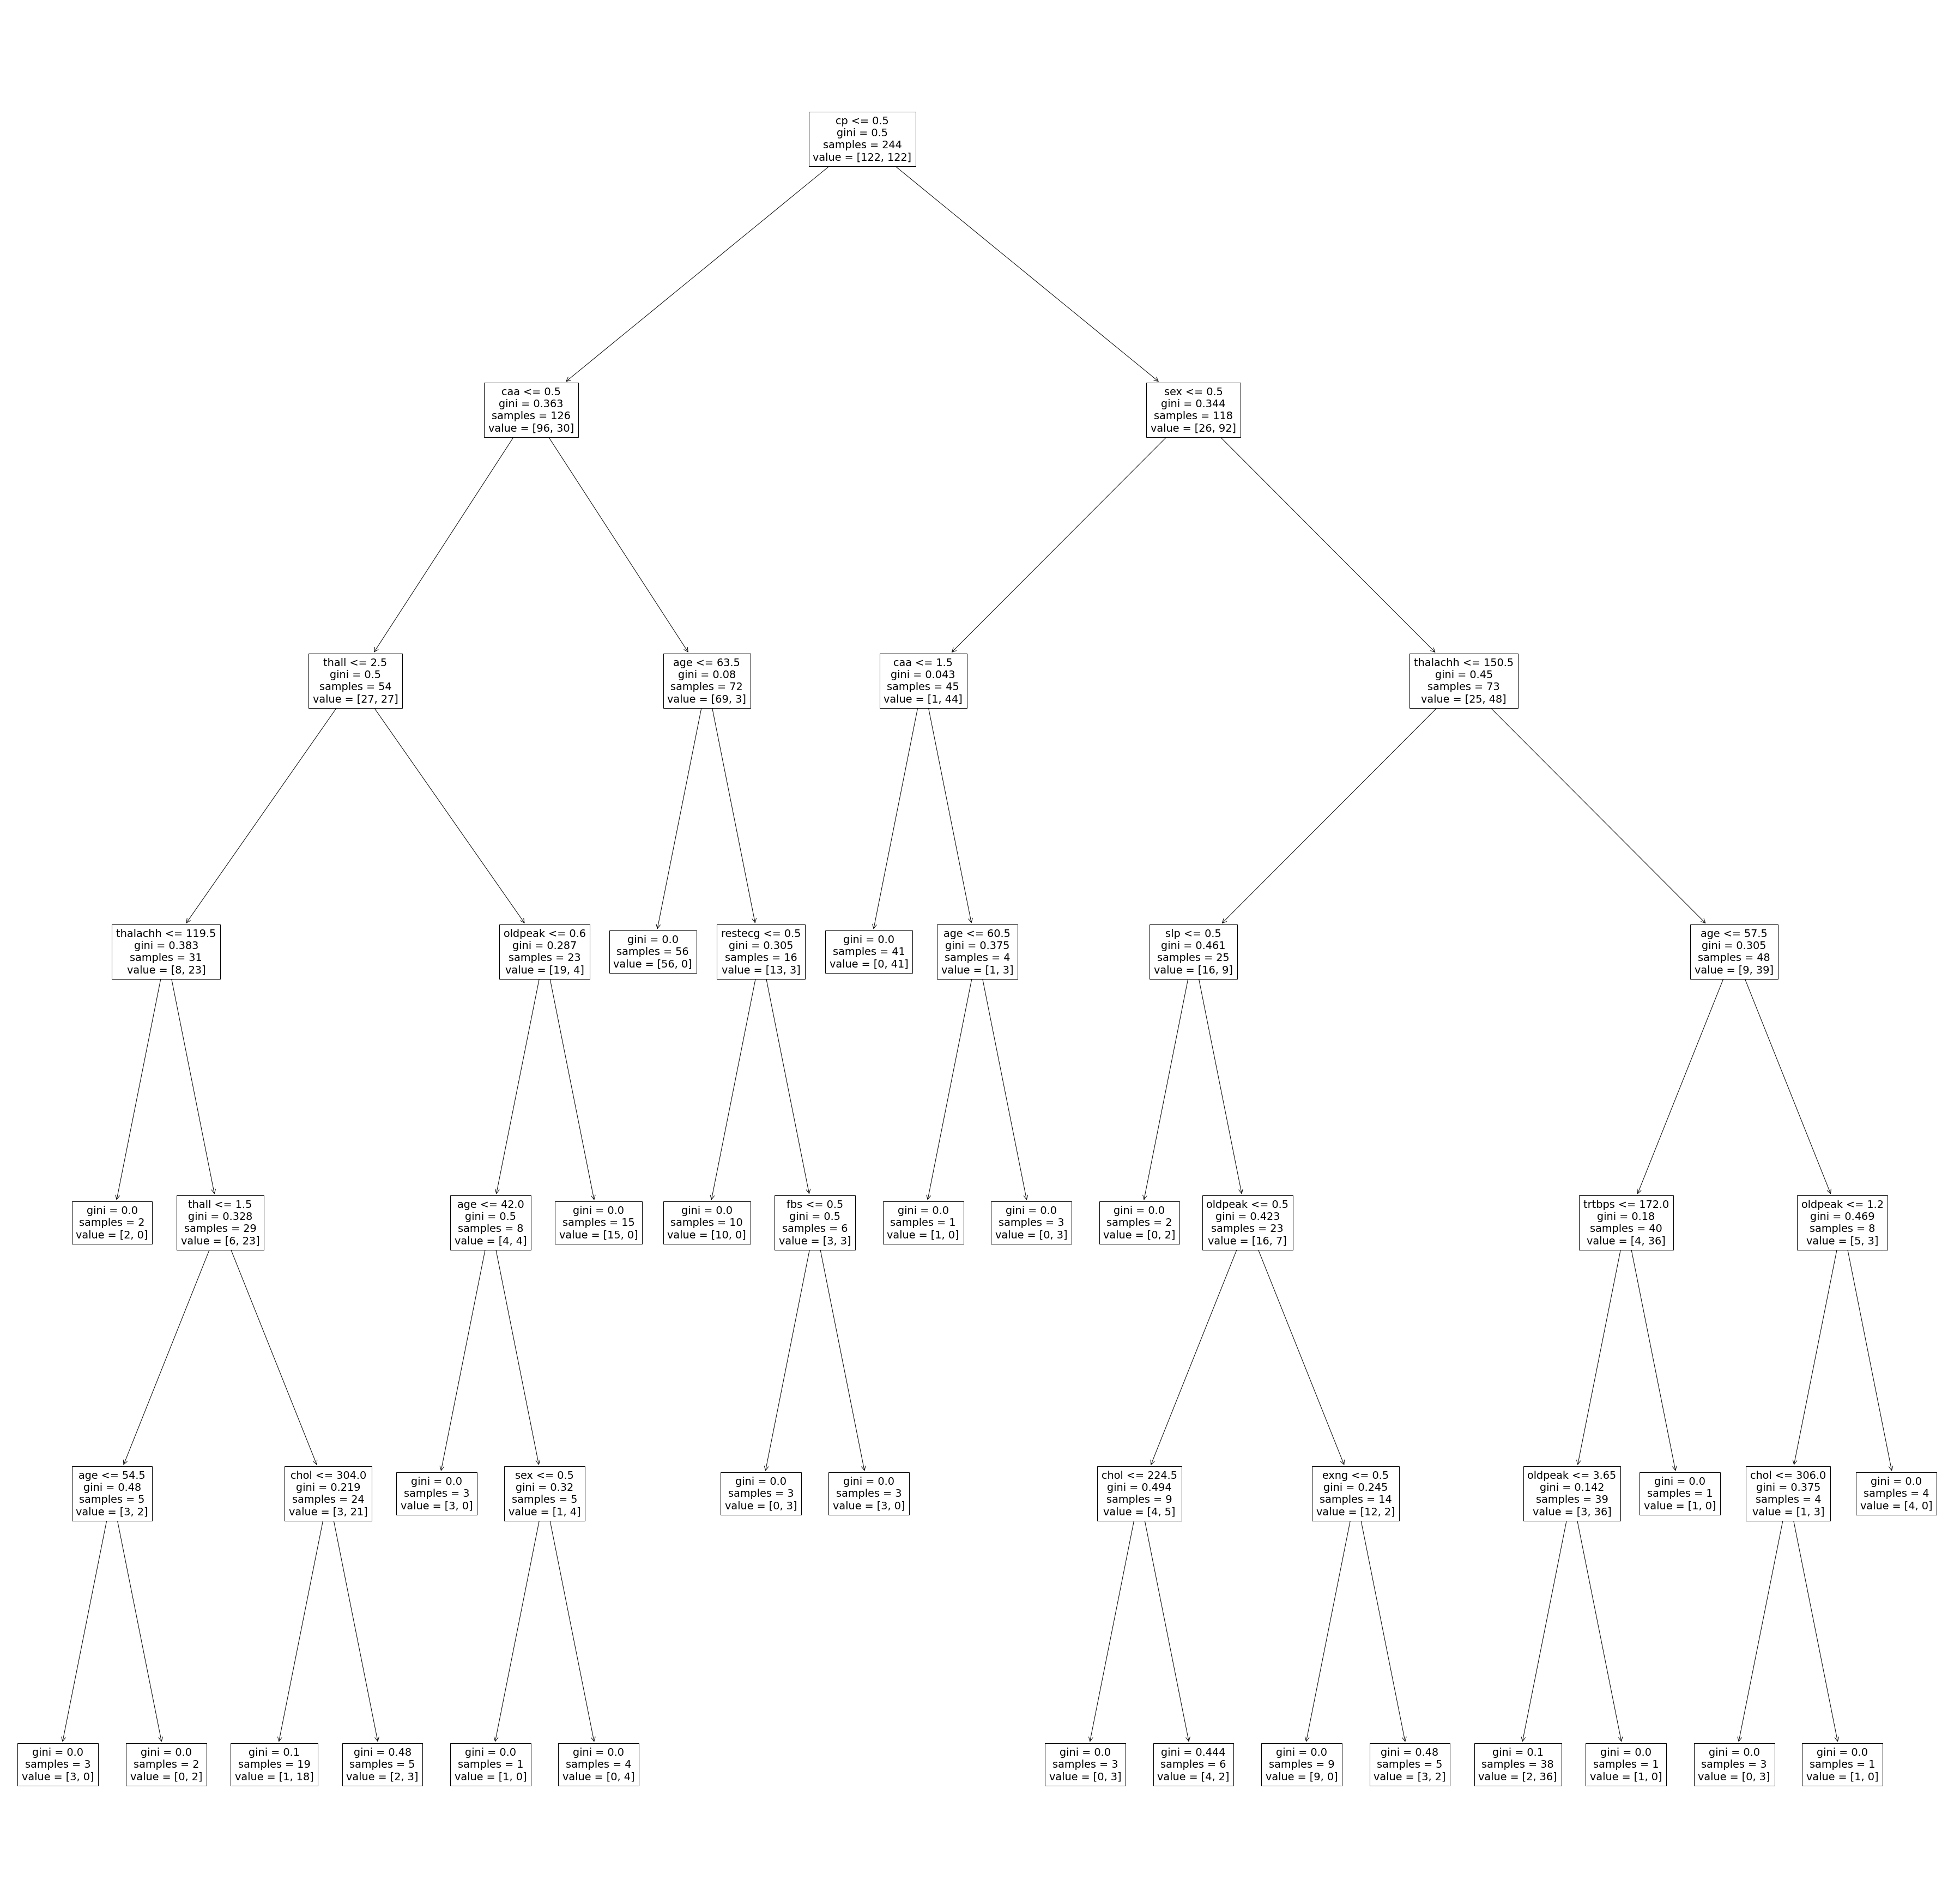

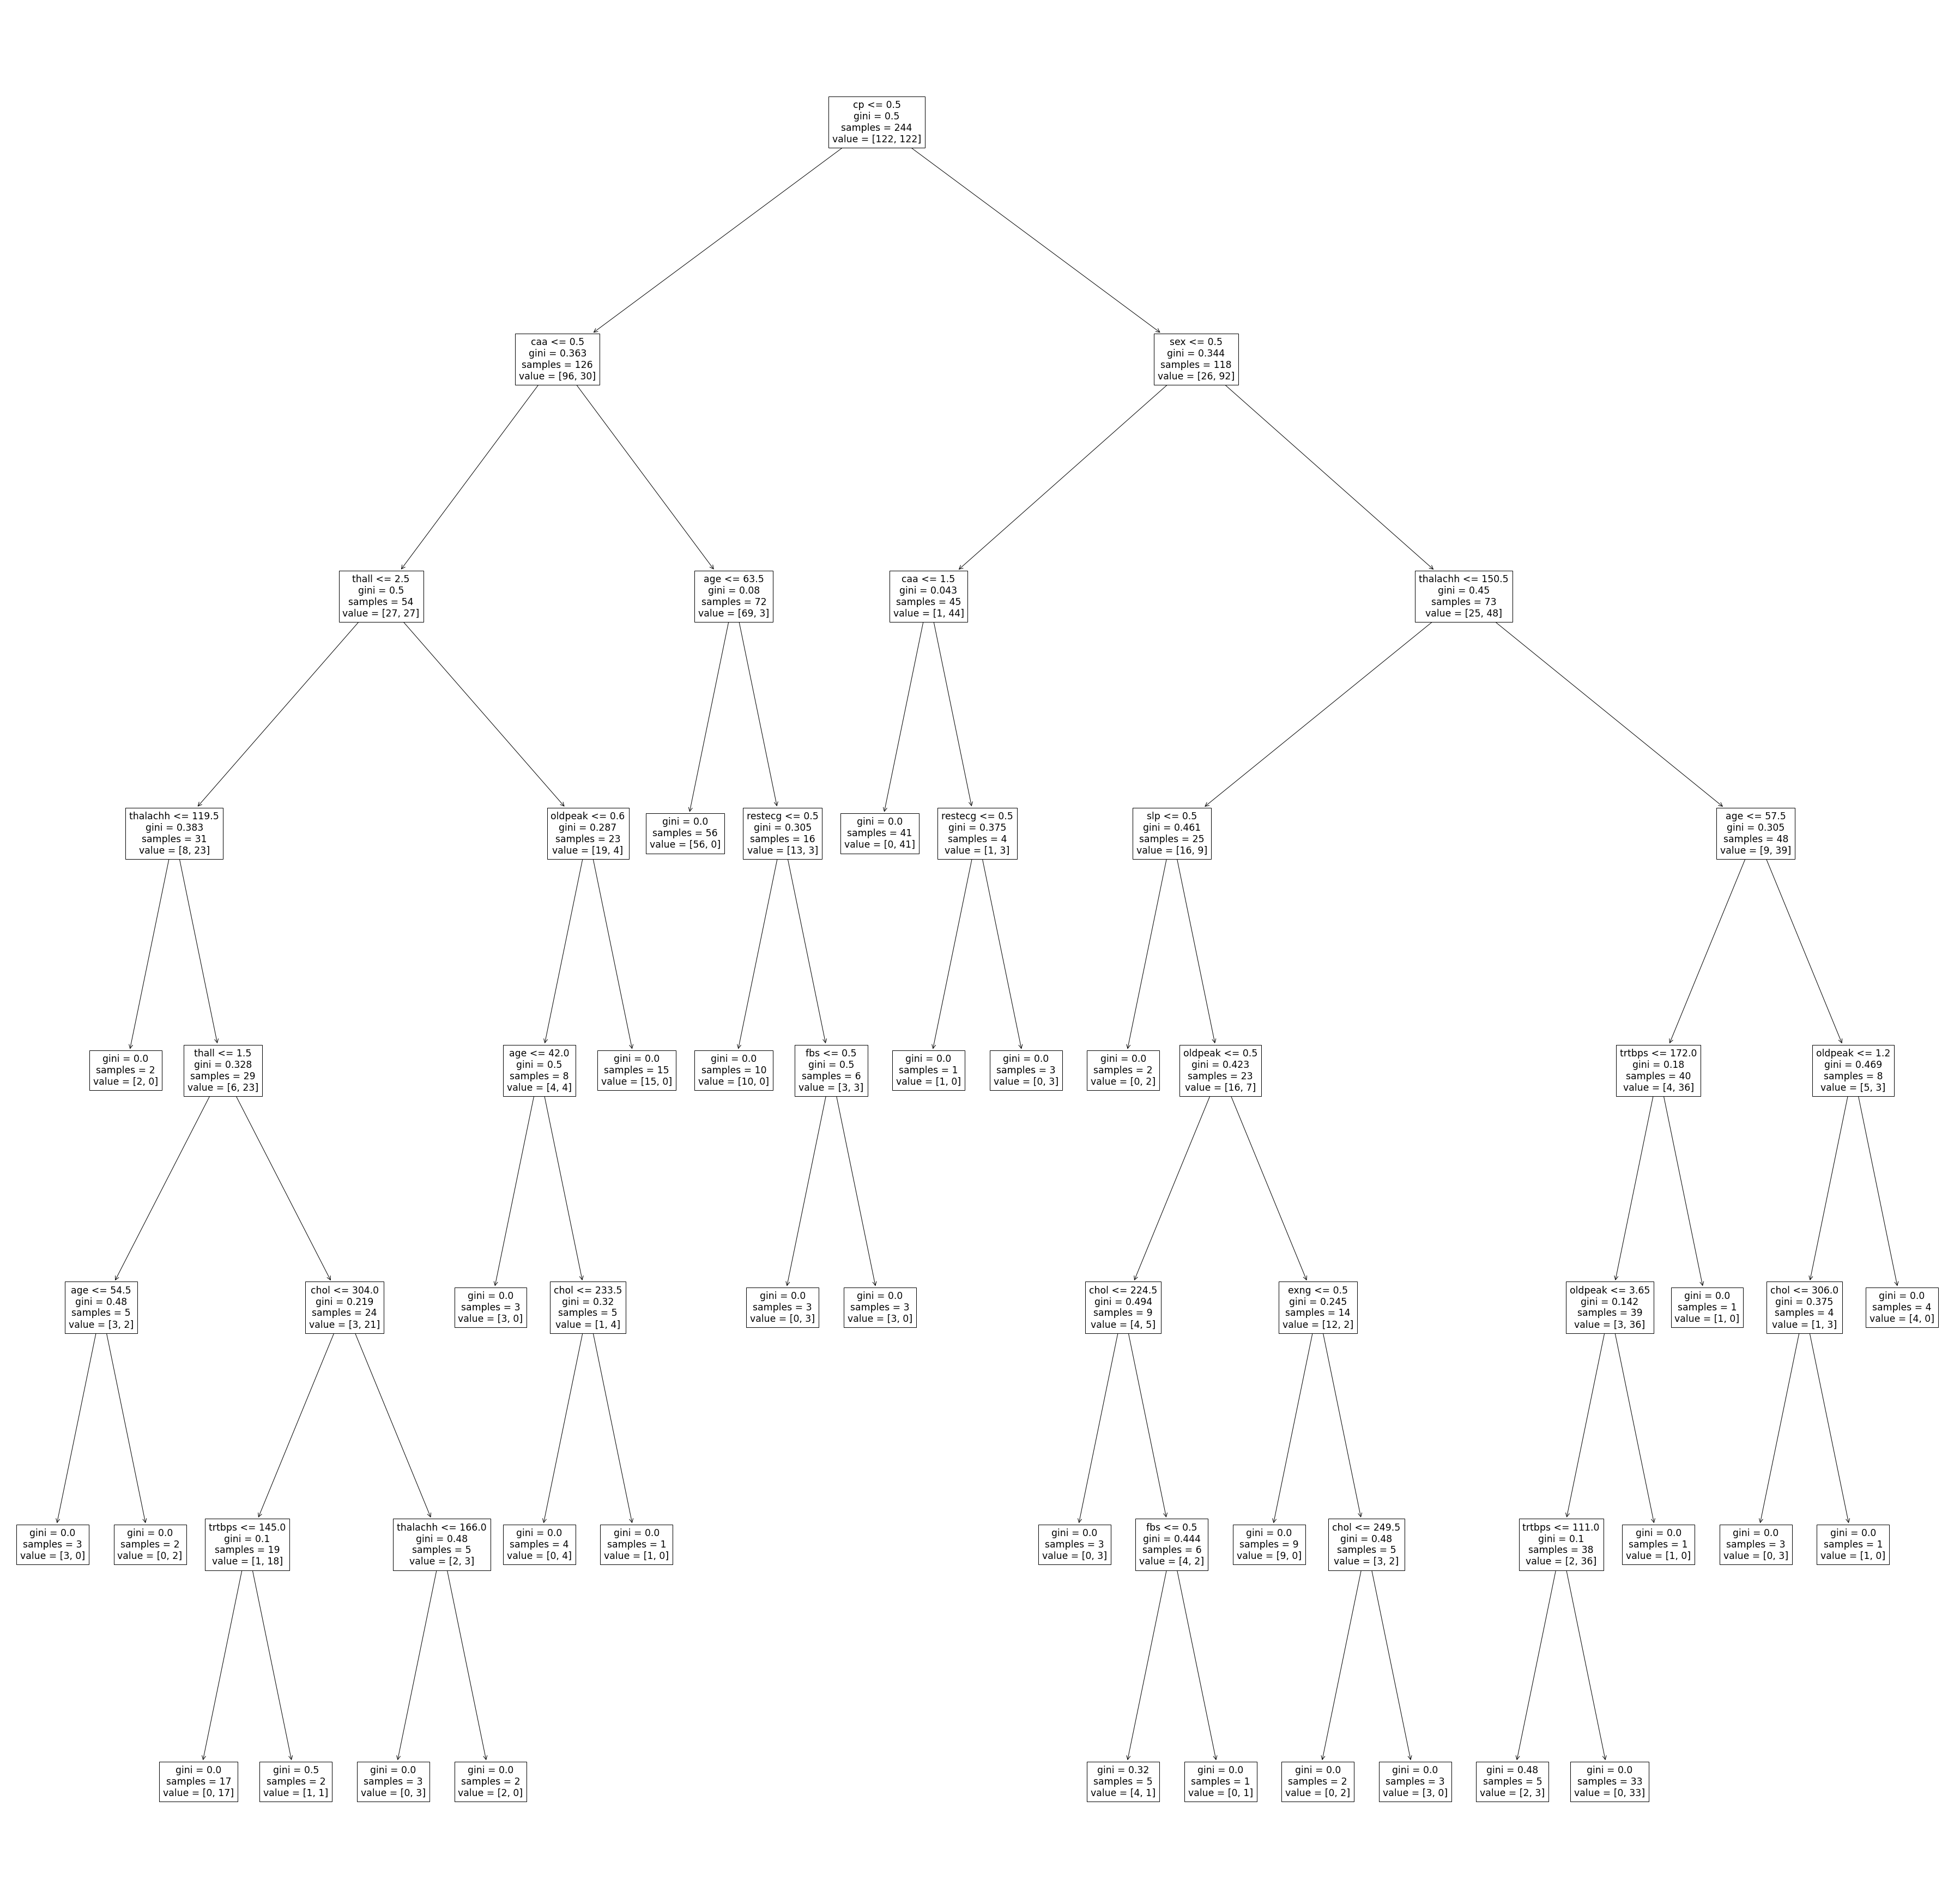

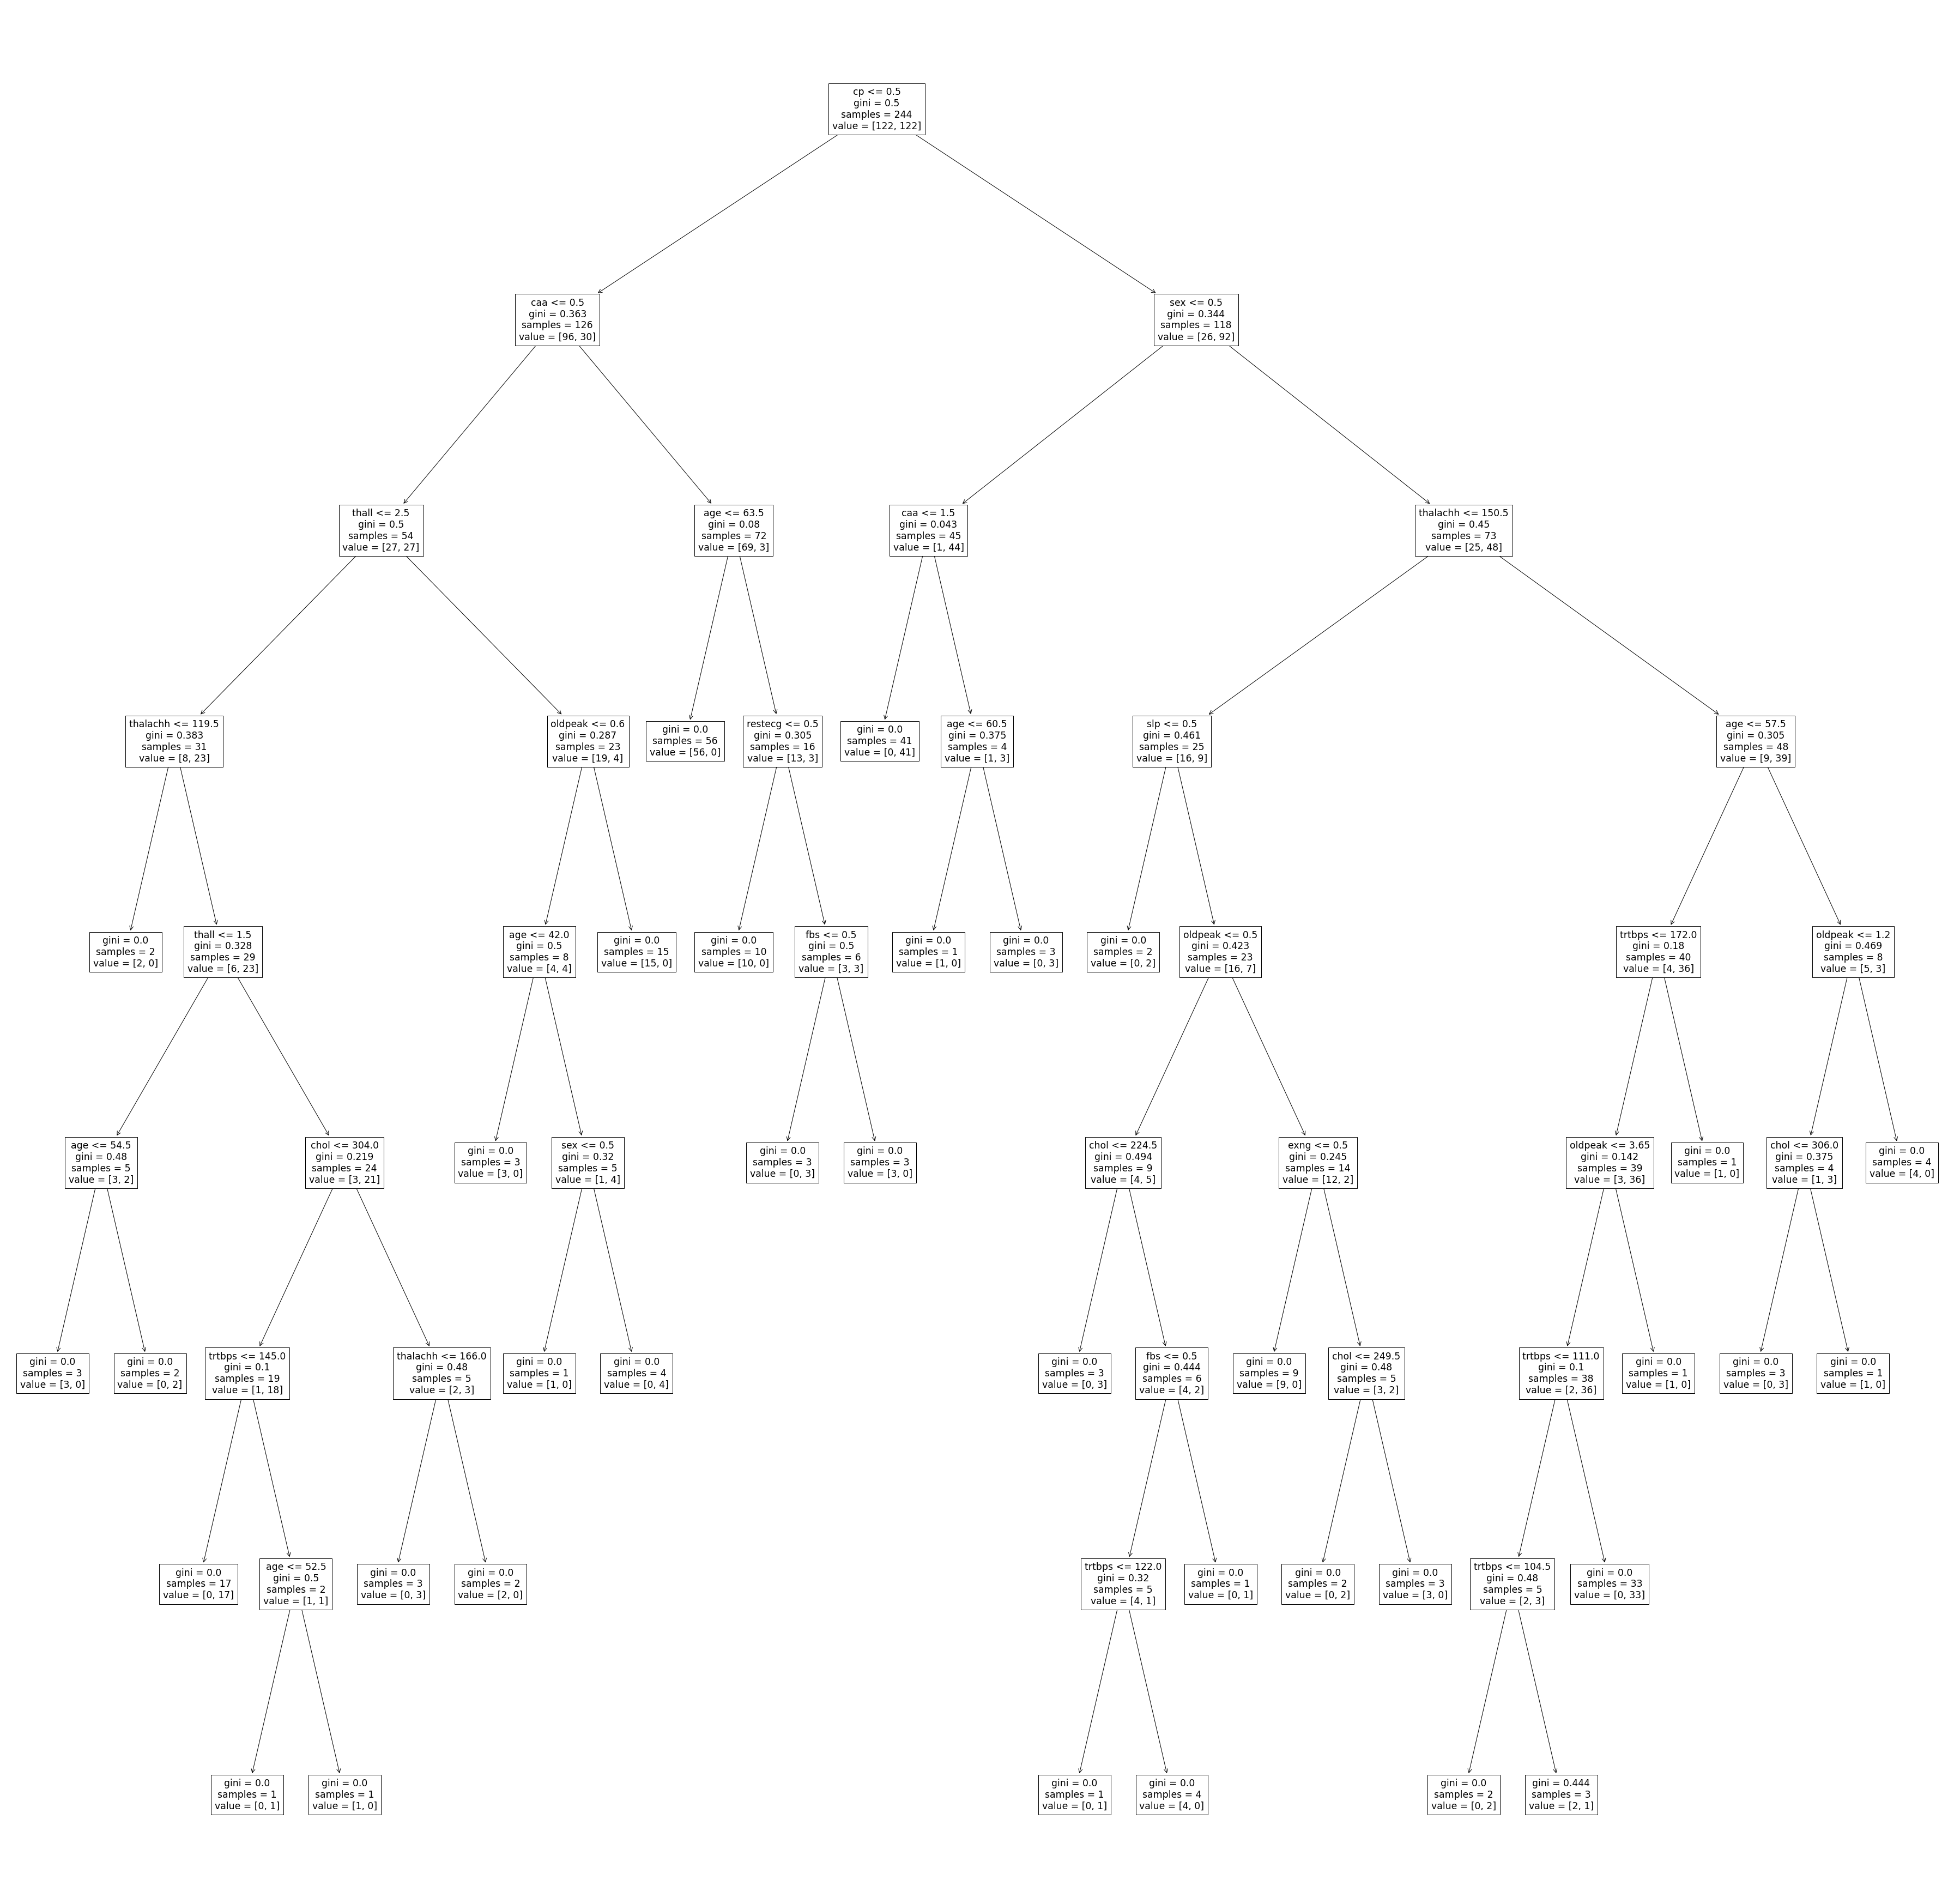

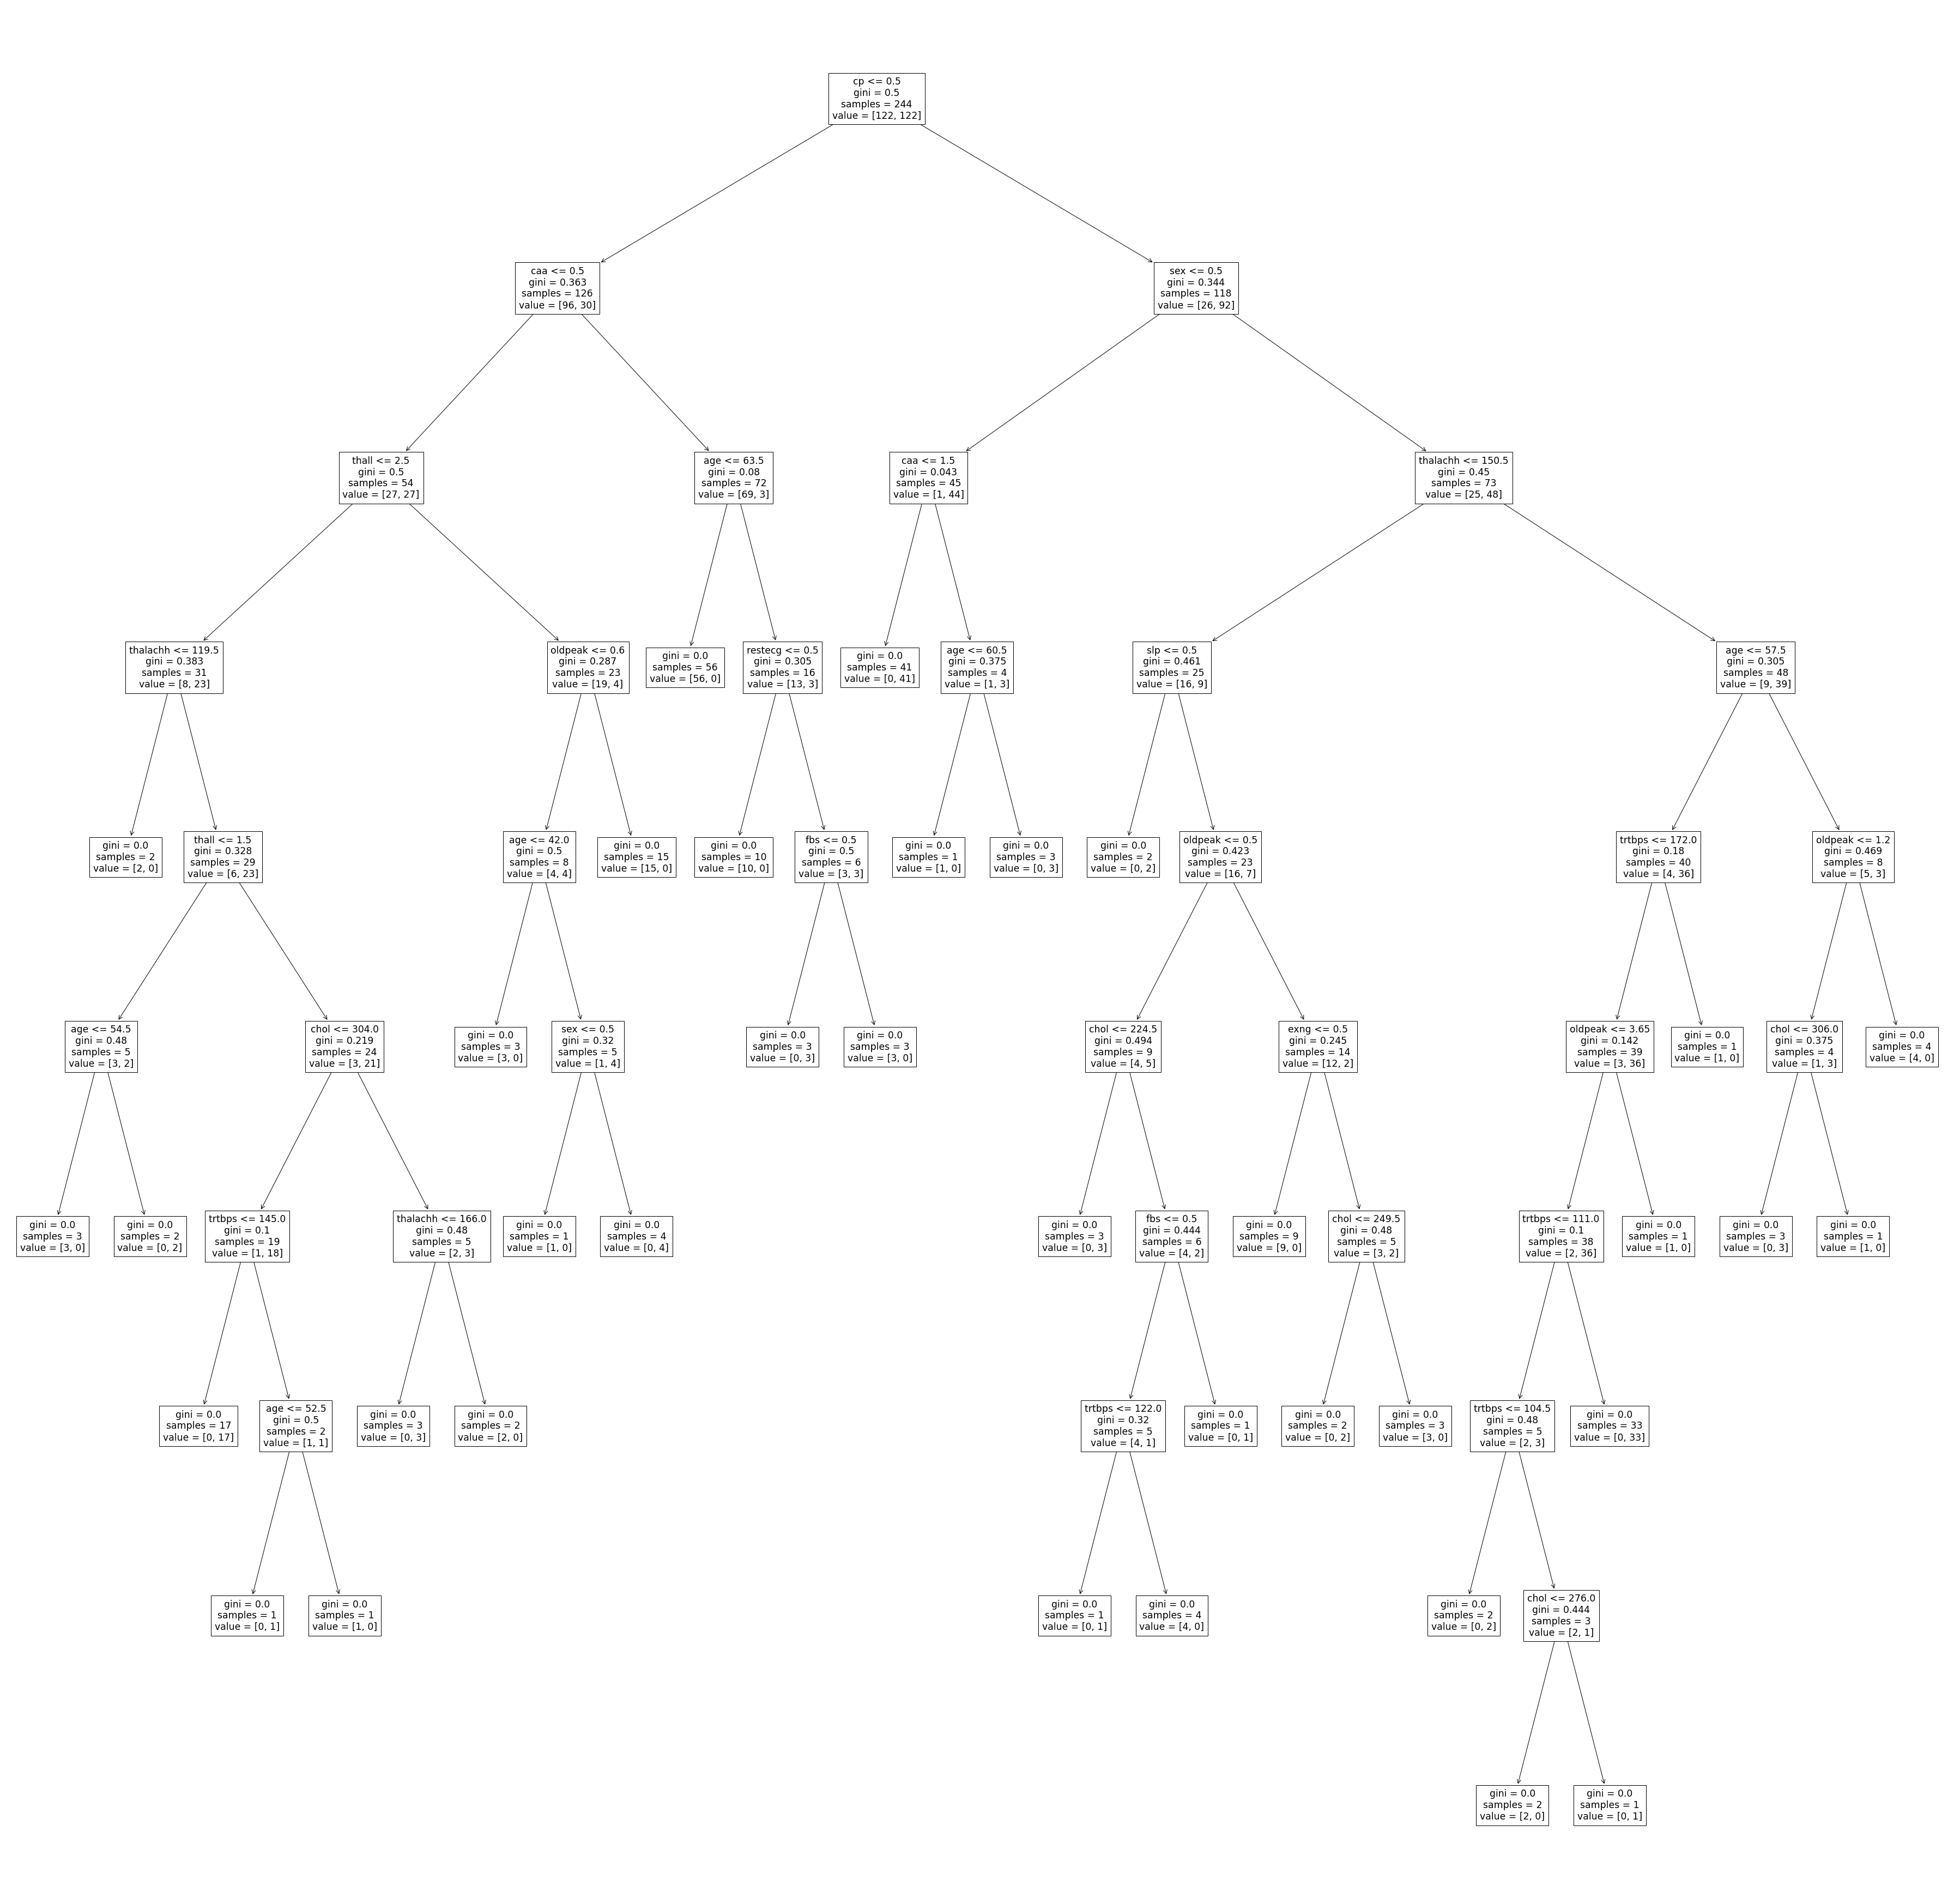

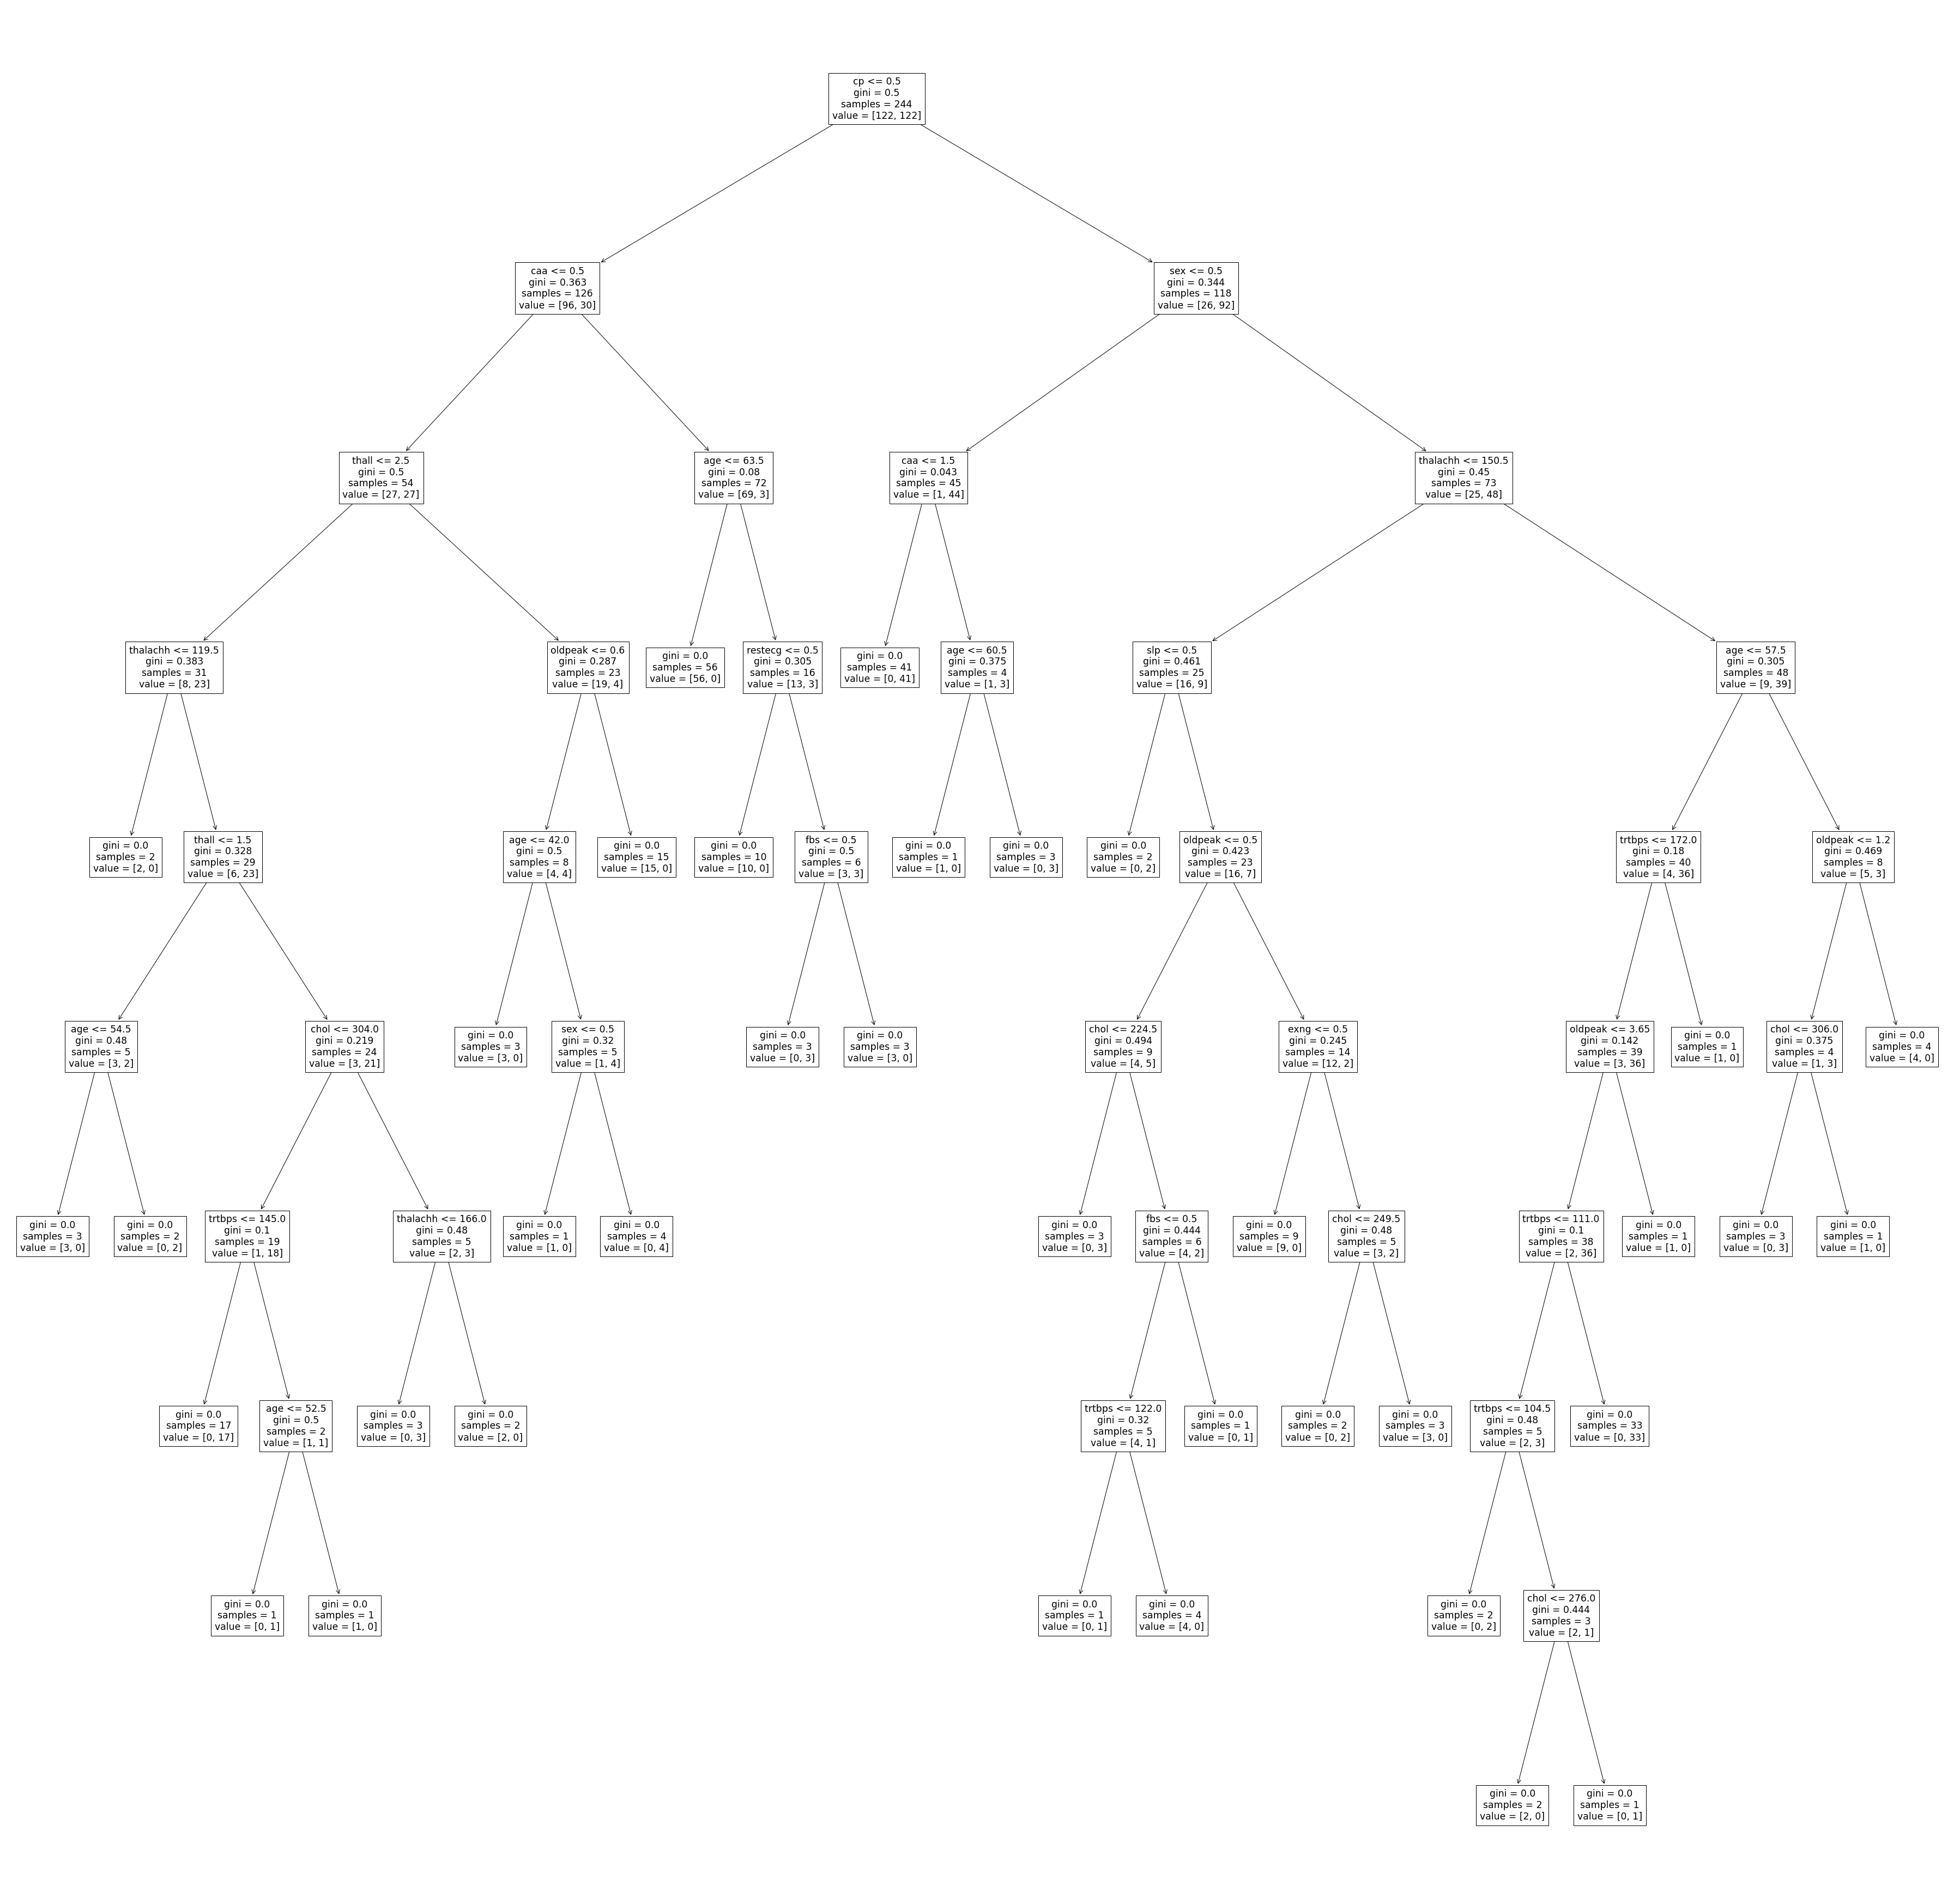

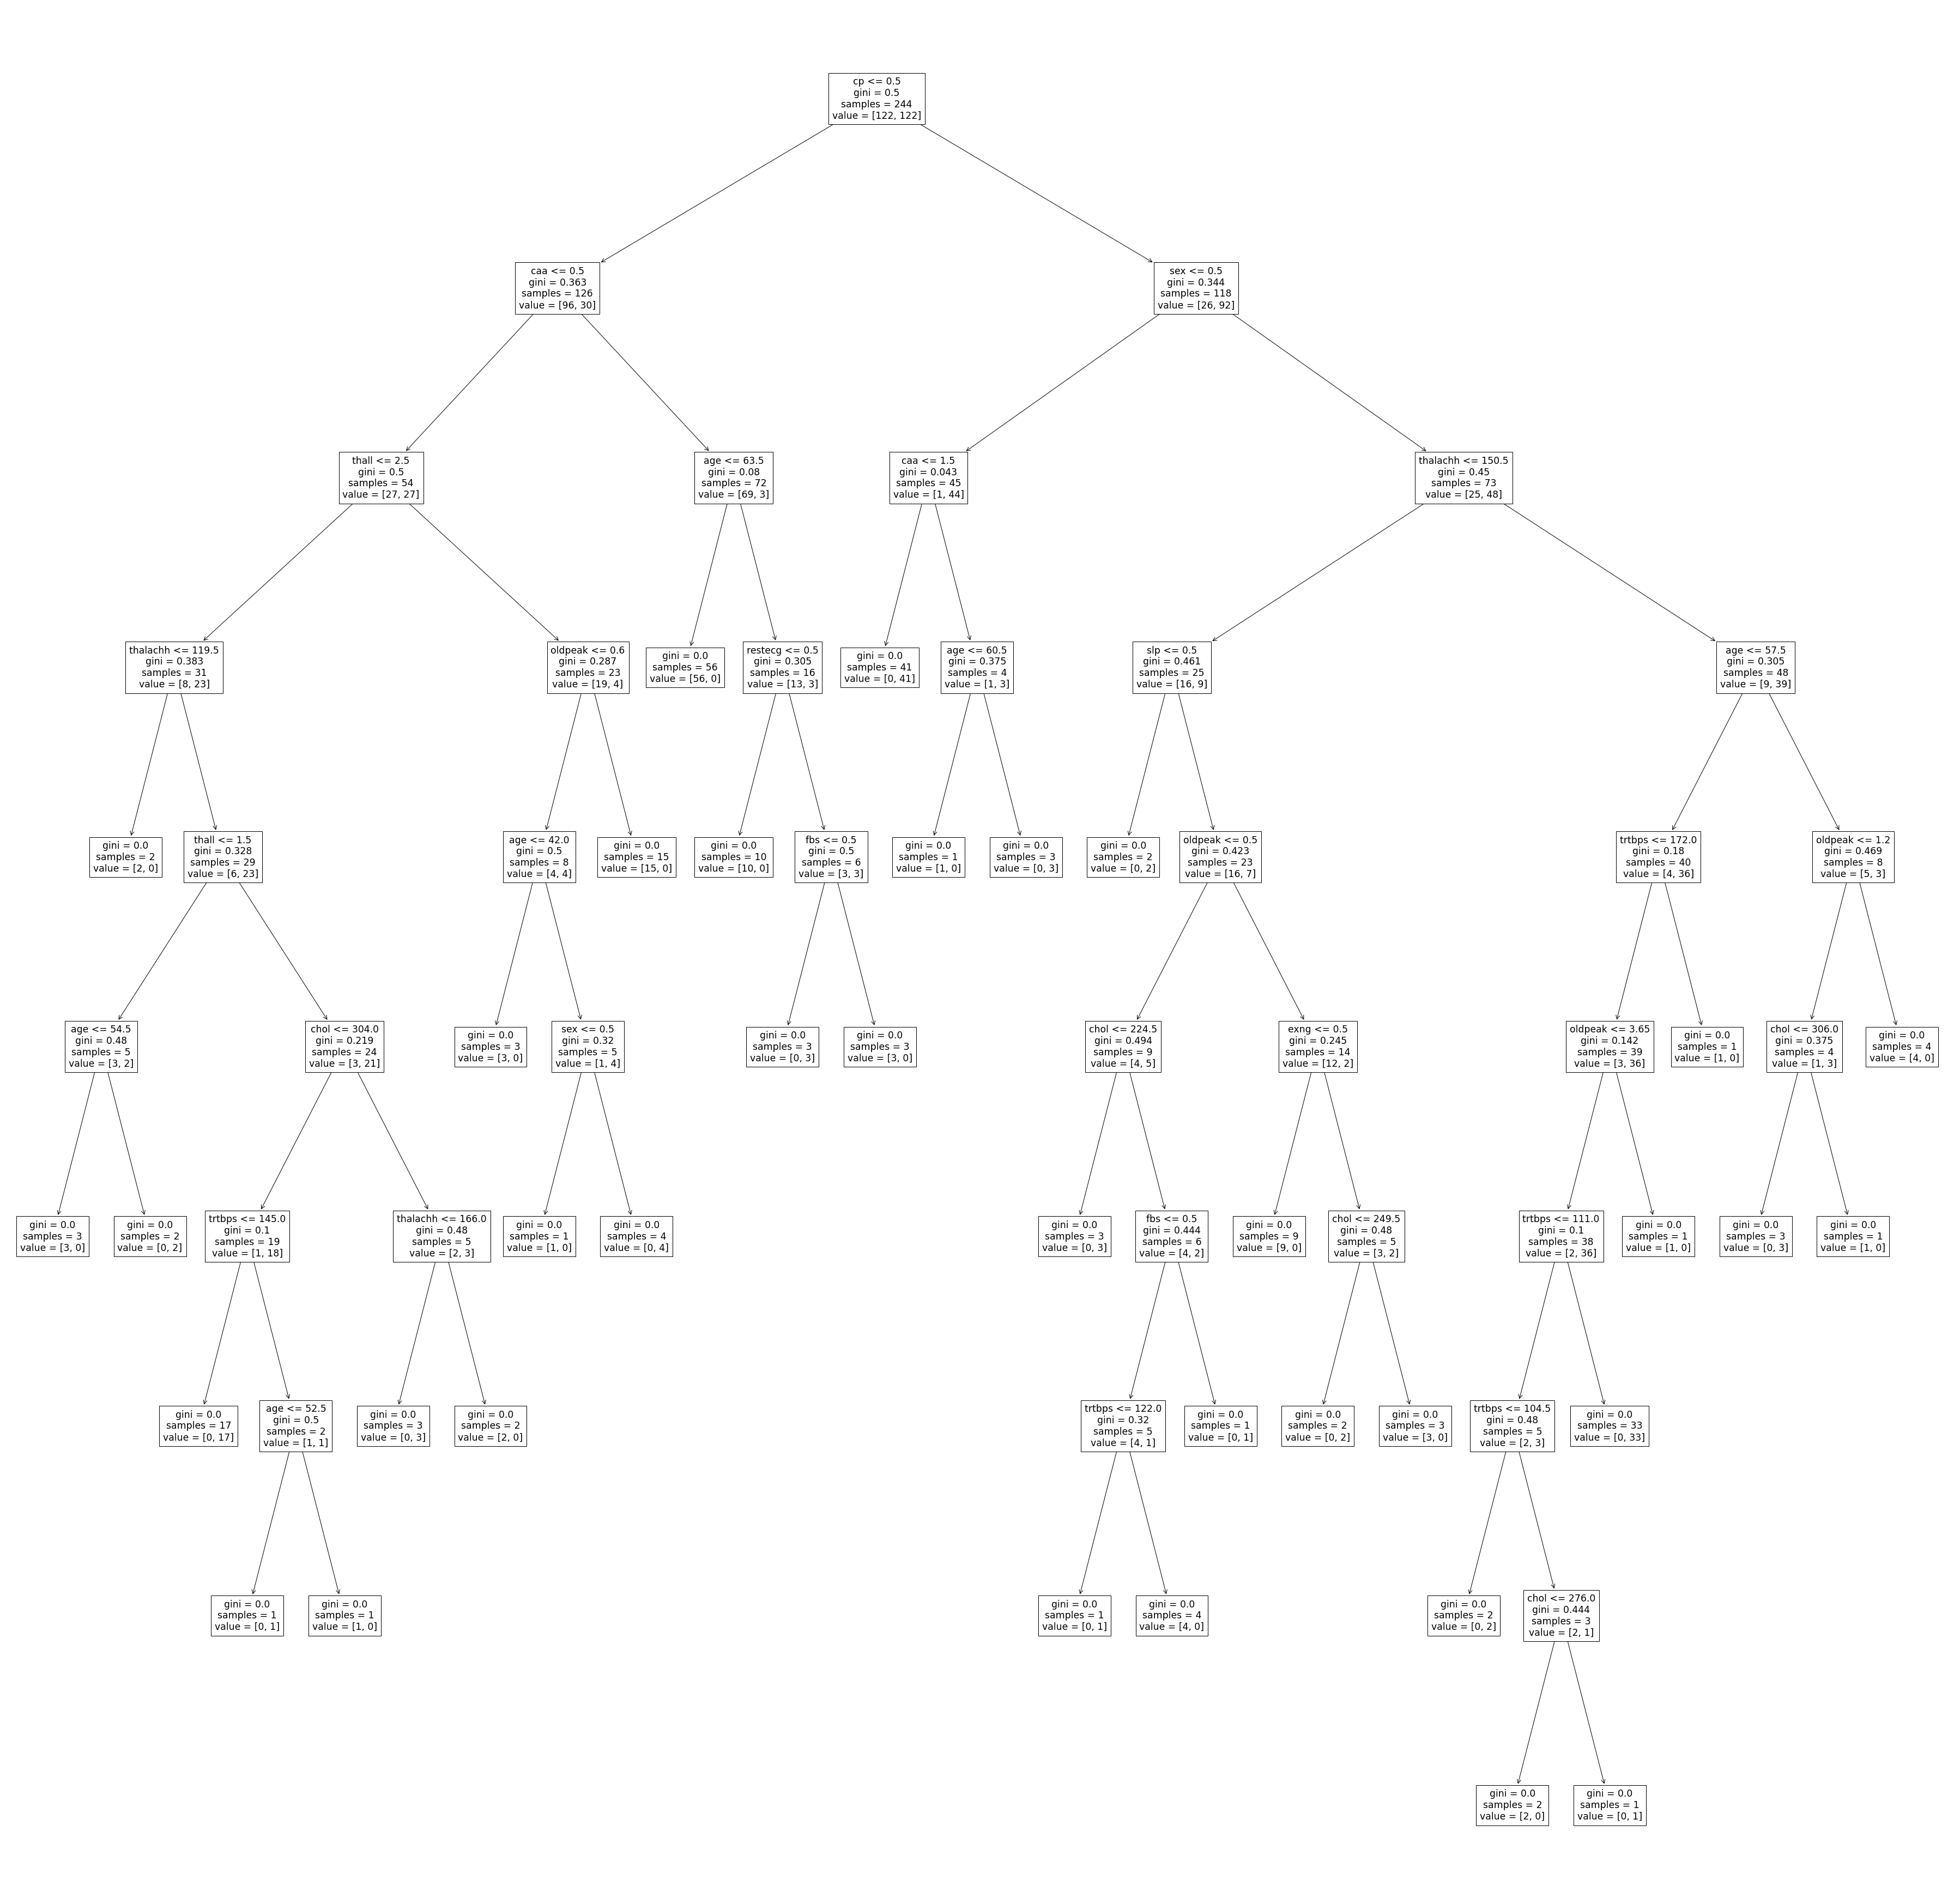

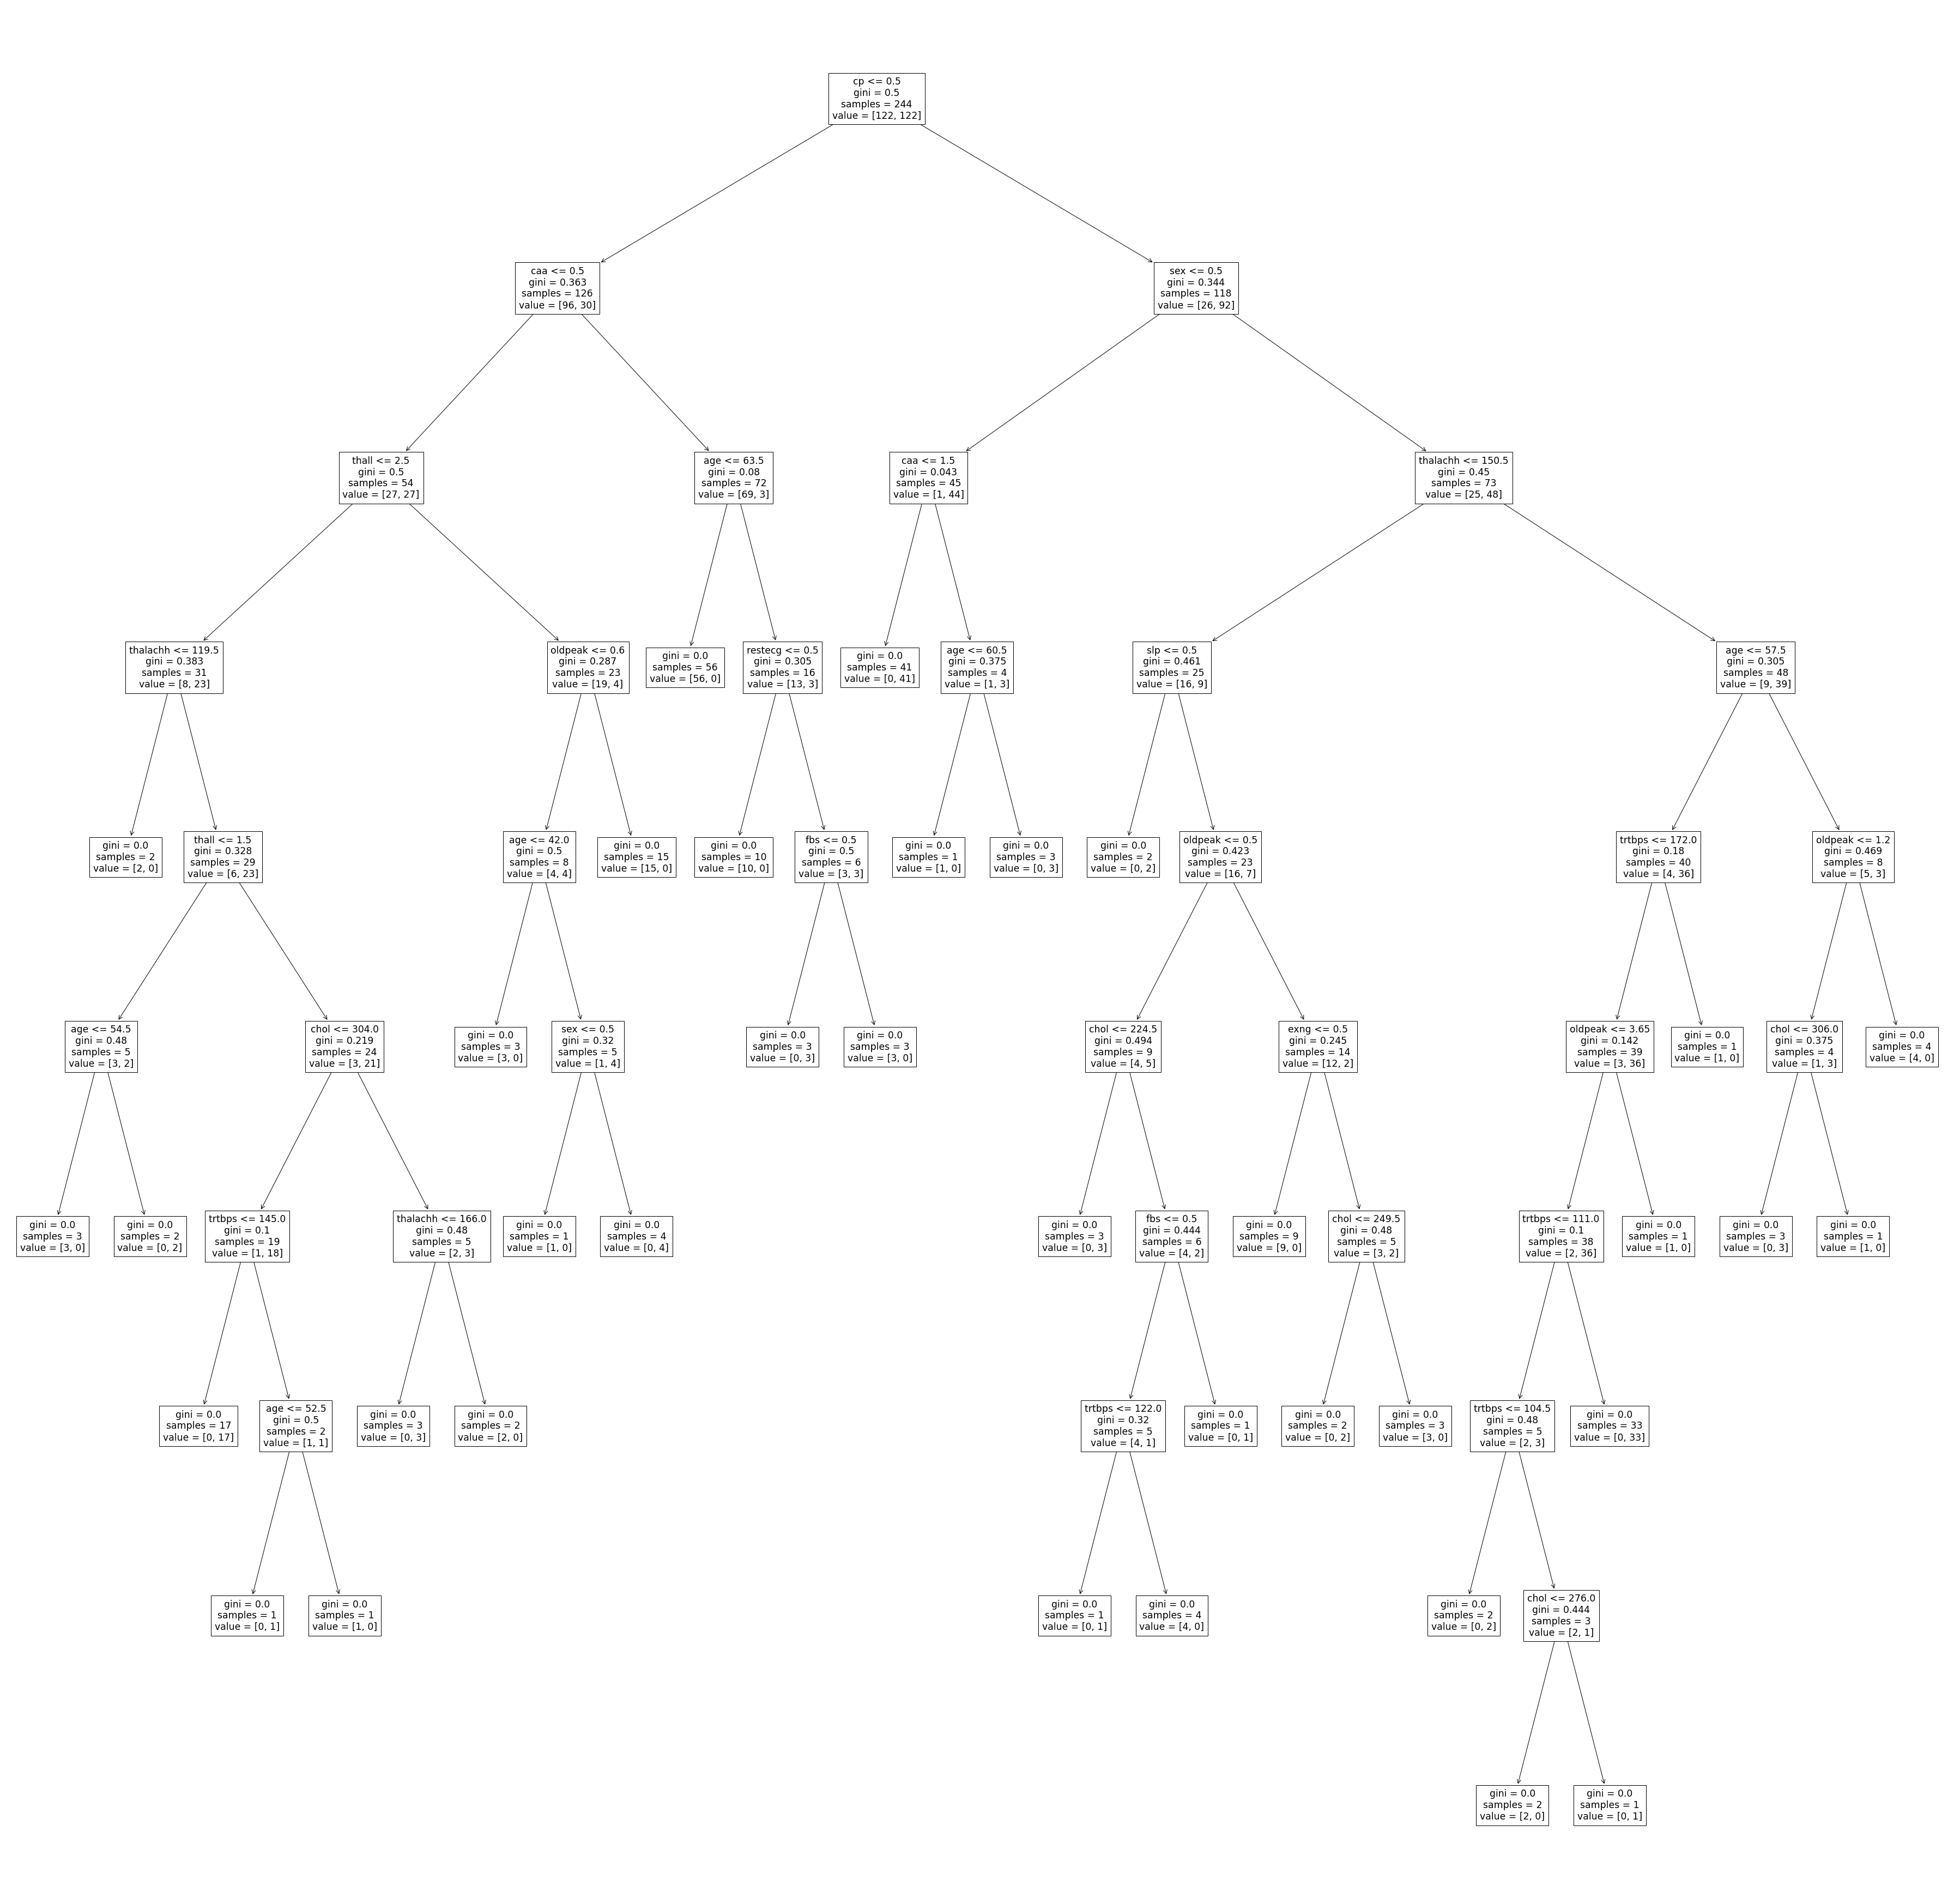

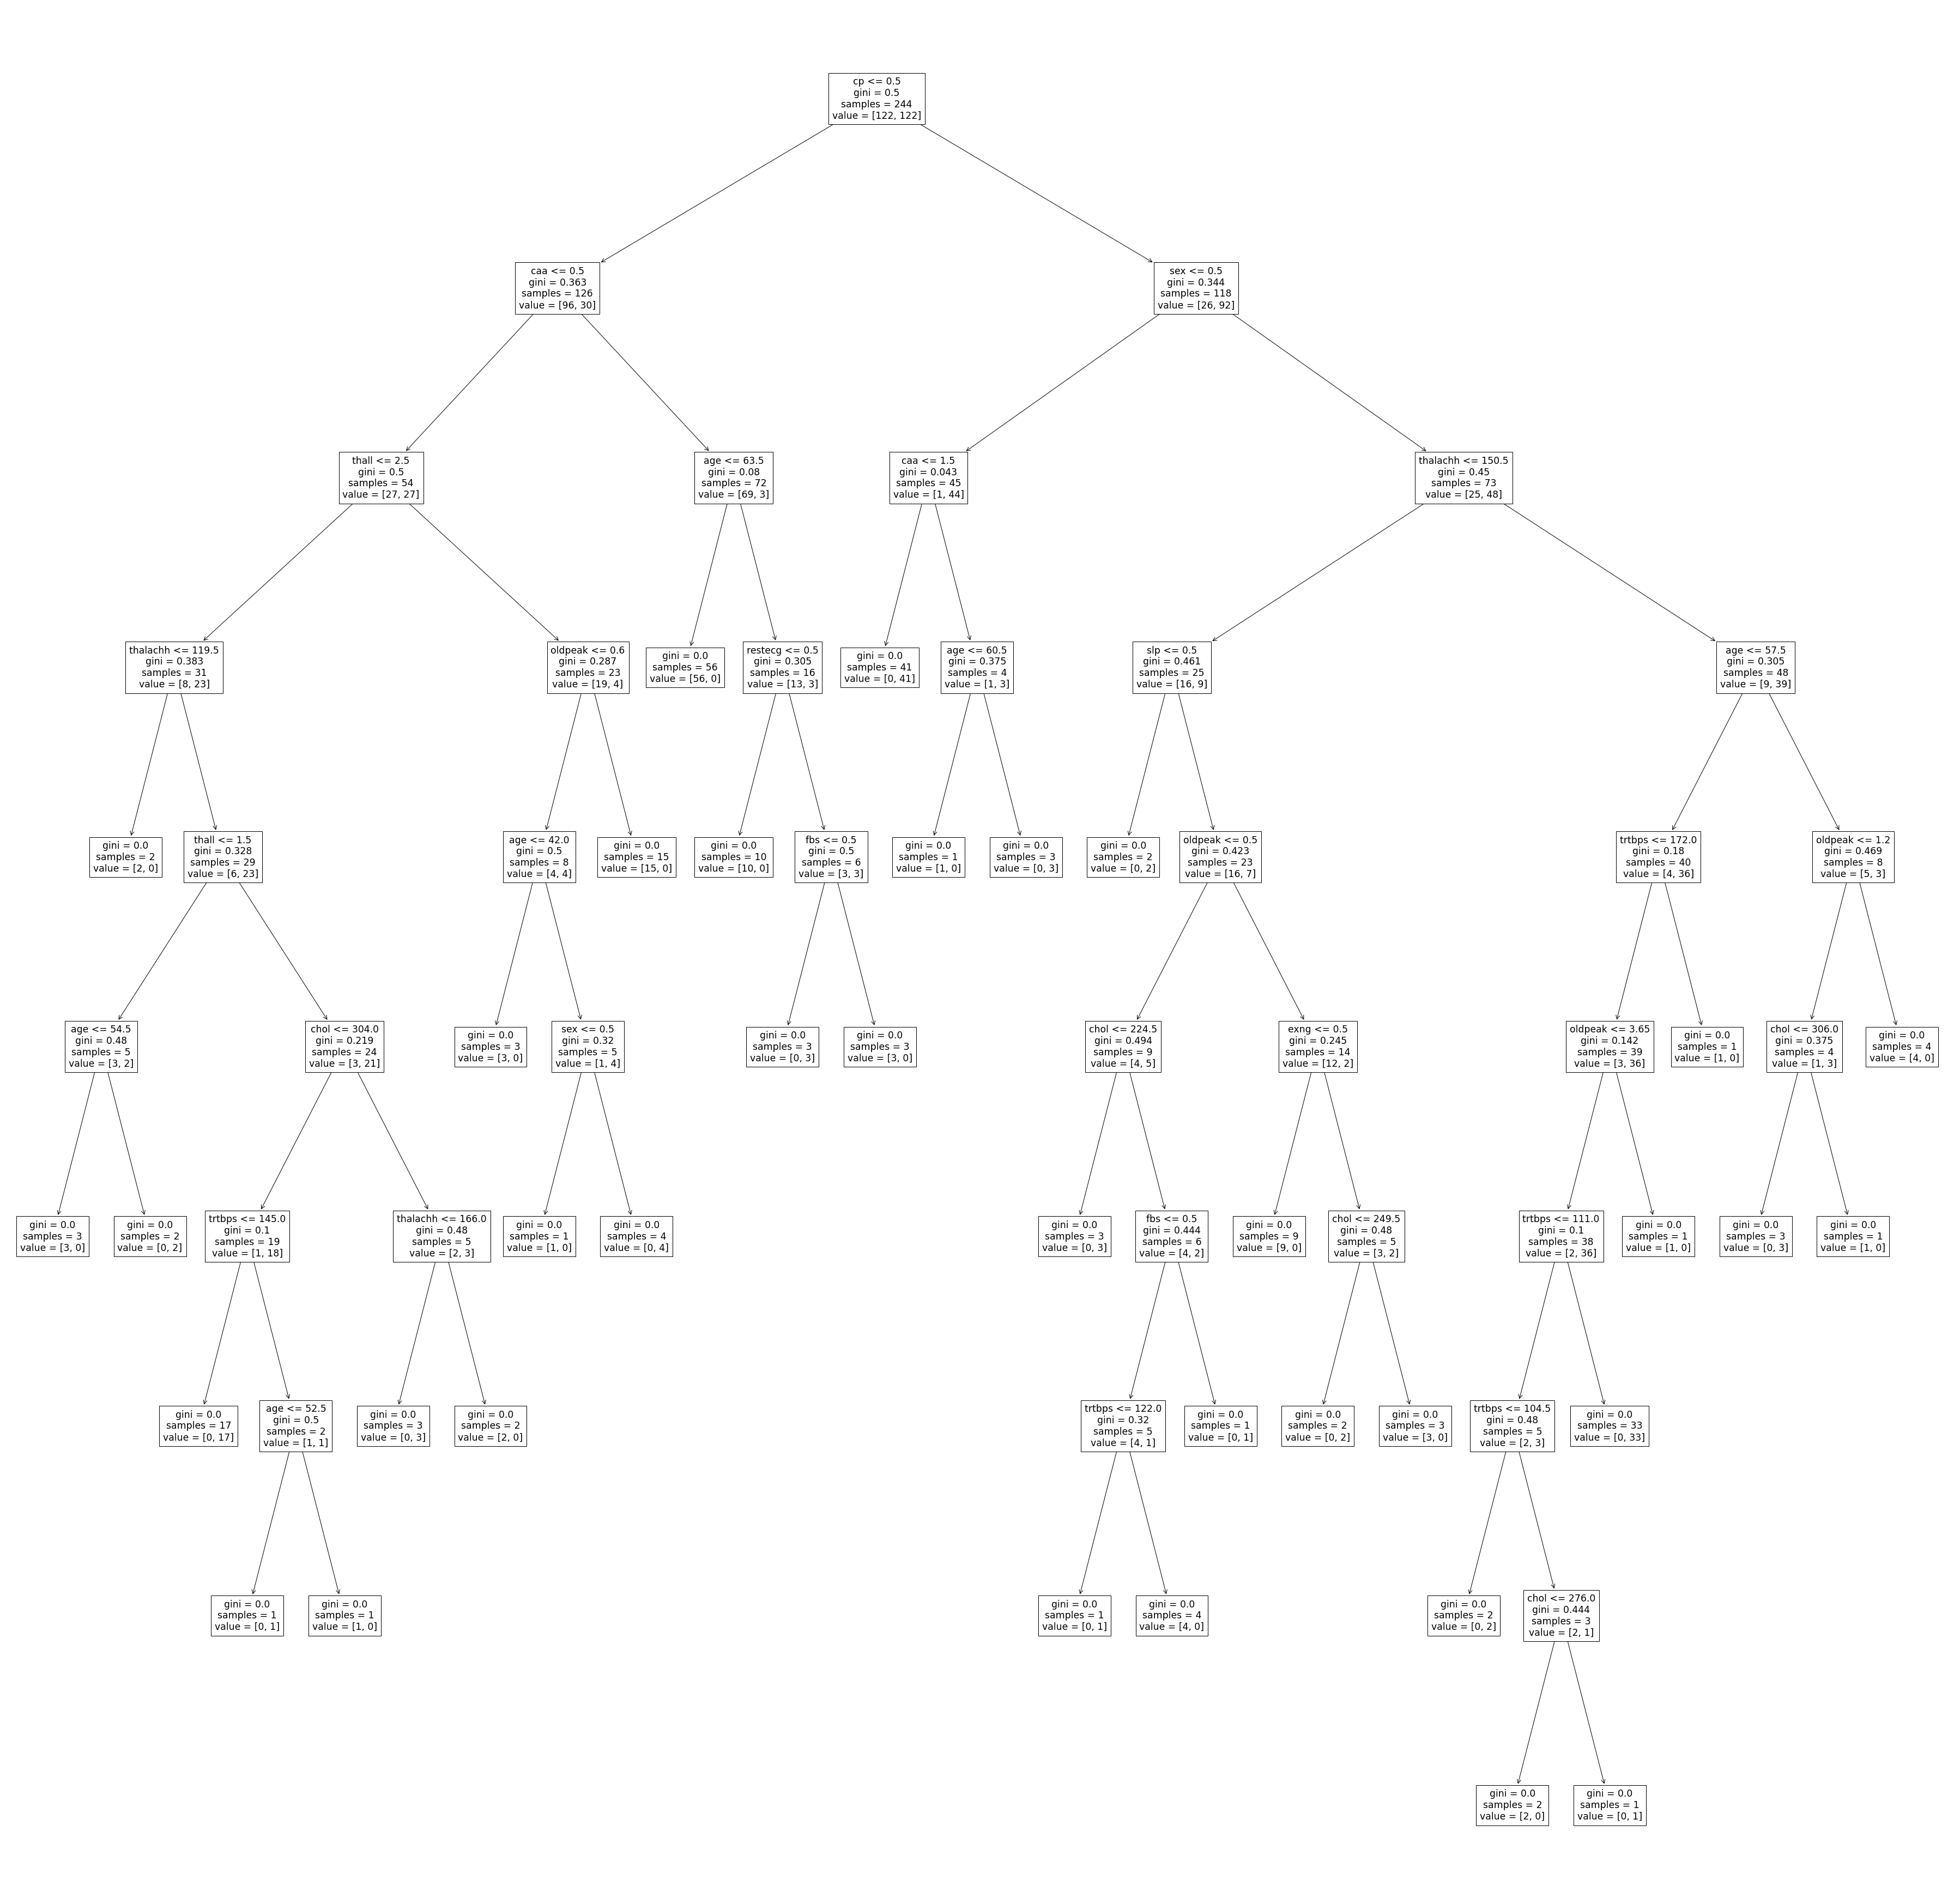

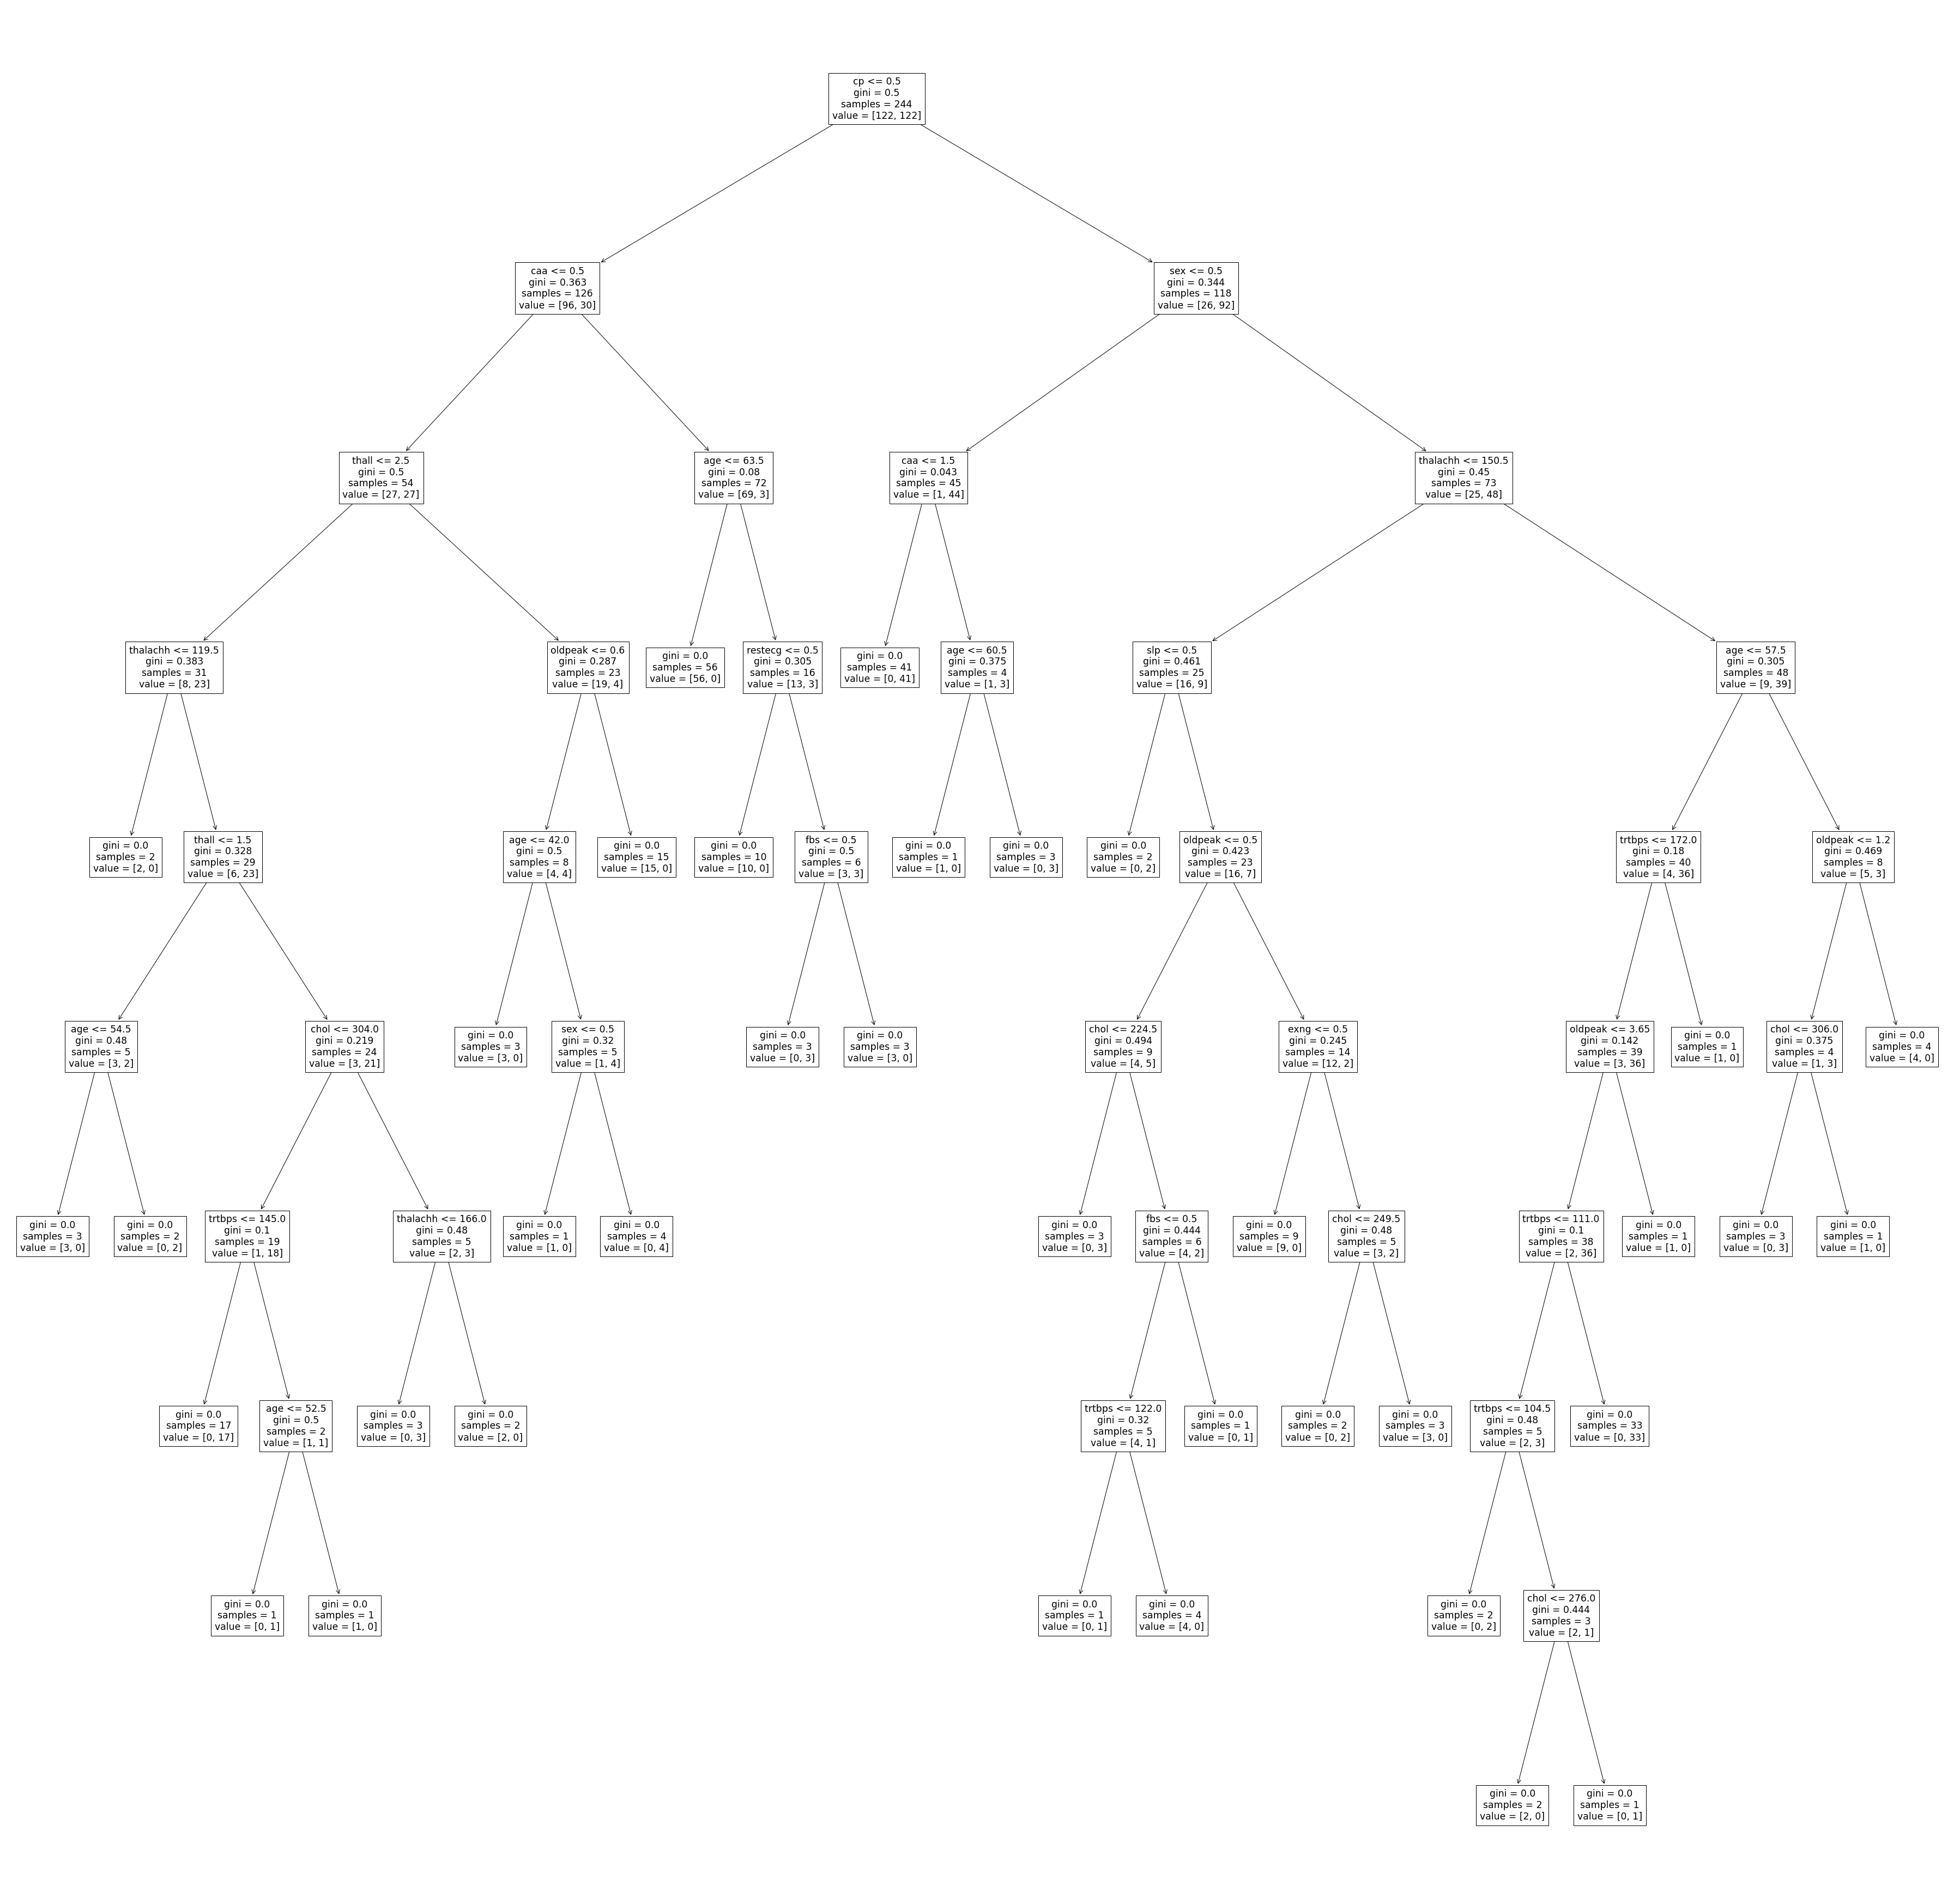

In [16]:
!mkdir img
!rm img/*tree_viz.png

for i in range(len(models)):
    plt.figure(figsize=(64,64))        
    tree.plot_tree(models[i],feature_names=df.columns)
    plt.savefig('img/d('+str(models[i].max_depth)+')-tree_viz.png')
!open .

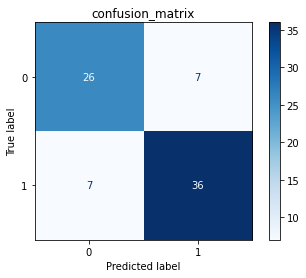

In [20]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(best_clf, X_test, y_test,
                                 display_labels=np.unique(y),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("confusion_matrix")
plt.savefig('confusion_matrix.png')

In [21]:
y_test.shape

(76, 1)

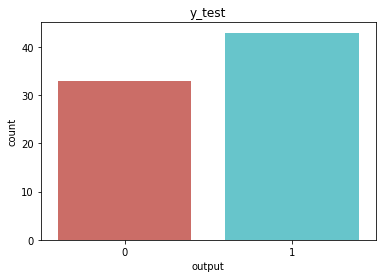

In [22]:
sns.countplot(x='output',data=y_test,palette='hls')
plt.title("y_test")
plt.savefig('y_test.png')

In [23]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

feature  importance
2         cp       0.293
11       caa       0.110
0        age       0.097
7   thalachh       0.094
12     thall       0.085
9    oldpeak       0.069
4       chol       0.065
1        sex       0.060
3     trtbps       0.054
5        fbs       0.033
6    restecg       0.015
10       slp       0.015
8       exng       0.008

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [25]:
best_clf.tree_.feature.shape

(63,)

In [ ]:
"""

n_nodes = best_clf.tree_.node_count
children_left = best_clf.tree_.children_left
children_right = best_clf.tree_.children_right
feature = best_clf.tree_.feature
threshold = best_clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("=",df.columns[feature[i]],"=")
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

plt.figure(figsize=(64,64))        
tree.plot_tree(best_clf,feature_names=df.columns)
plt.savefig('tree_viz.png')
"""

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#pca = PCA()

pipe = Pipeline(steps=[
                        #('pca', PCA()),
                        ('std', StandardScaler()),
                        ('tree', DecisionTreeClassifier())])
param_grid = {
    #'pca__n_components': list(range(1, df.columns.shape[0]-1)),

    'tree__max_depth':  list(range(1, 15)),
    "tree__criterion" : ['gini', 'entropy'],
    'tree__max_leaf_nodes': [2,4,6,8,16,32,64,128], 
    'tree__min_samples_split': [2, 3, 4],
    #"tree__random_state": [0]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5)
search.fit(X_train_sm, y_train_sm)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
# Plot the PCA spectrum
"""
pca.fit(X_test)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, df.columns.shape[0]-1)

plt.tight_layout()

plt.savefig('tree_viz.png')
"""

Best parameter (CV score=0.808):
{'tree__criterion': 'entropy', 'tree__max_depth': 3, 'tree__max_leaf_nodes': 16, 'tree__min_samples_split': 2}


"\npca.fit(X_test)\n\nfig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))\nax0.plot(np.arange(1, pca.n_components_ + 1),\n         pca.explained_variance_ratio_, '+', linewidth=2)\nax0.set_ylabel('PCA explained variance ratio')\n\nax0.axvline(search.best_estimator_.named_steps['pca'].n_components,\n            linestyle=':', label='n_components chosen')\nax0.legend(prop=dict(size=12))\n\n# For each number of components, find the best classifier results\nresults = pd.DataFrame(search.cv_results_)\ncomponents_col = 'param_pca__n_components'\nbest_clfs = results.groupby(components_col).apply(\n    lambda g: g.nlargest(1, 'mean_test_score'))\n\nbest_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',\n               legend=False, ax=ax1)\nax1.set_ylabel('Classification accuracy (val)')\nax1.set_xlabel('n_components')\n\nplt.xlim(-1, df.columns.shape[0]-1)\n\nplt.tight_layout()\n\nplt.savefig('tree_viz.png')\n"

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        33
           1       0.79      0.79      0.79        43

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



0.758985200845666

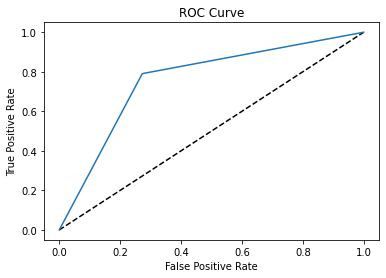

In [32]:
best_clf = search.best_estimator_
best_clf.fit(X_train_sm, y_train_sm)
y_pred = best_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, roc_curve
print(classification_report(y_test, y_pred))
fpr,tpr,threshols=roc_curve(y_test,y_pred)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='tree classifier ')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.savefig('ROC_pca.png')
from sklearn import metrics
metrics.auc(fpr, tpr)

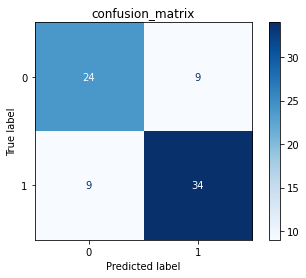

In [33]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(best_clf, X_test, y_test,
                                 display_labels=np.unique(y),
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("confusion_matrix")
plt.savefig('confusion_matrix_pca.png')

## Code 2

In [34]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier()]
models = dict(zip(key,value))
print(models)

NameError: name 'LogisticRegression' is not defined

https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python

# old
https://www.kaggle.com/gpreda/reddit-vaccine-myths
## solutions
other [k-means](https://www.kaggle.com/accountstatus/brown-clustering-kmeans)